## Iš pridėto requirements.txt failo sukurti anacondos aplinką ir žemiau esančias užduotis vykdyti šioje aplinkoje

# Pirma Dalis

In [1]:
# 
# !pip install -r requirements.txt
%load_ext nb_black 



<IPython.core.display.Javascript object>

<font color='red'> Erikas Švažas: 

1. Šaunu, kad panaudotas nb_black! Puiki praktika! 

2. Pip puikiai tinka panašaus dydžio prejektui, bet kai bus daugiau dependencies conda gali turėti [privalumų](https://www.reddit.com/r/Python/comments/w564g0/comment/ih7jo6v/?utm_source=share&utm_medium=web2x&context=3) (nors ir viskas vyks super lėtai)

</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

# panaikina scientific skaičius atsakymuose
pd.options.display.float_format = '{:.4f}'.format

pd.set_option("display.max_columns", 50)


<IPython.core.display.Javascript object>

In [3]:
raw_balanso_ataskaita_2020 = pd.read_csv('https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv')
raw_balanso_ataskaita_2021 = pd.read_csv('https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2021.csv')

<IPython.core.display.Javascript object>

In [4]:
raw_pelno_ataskaita_2020 = pd.read_csv('https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2020.csv')
raw_pelno_ataskaita_2021 = pd.read_csv('https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2021.csv')

<IPython.core.display.Javascript object>

## 3.1 Ką reiškia skirtingi duomenų laukai? Iš kokių atributų sudaryti duomenys?

Kad geriau suprasti skirtingus duomenų tipus, jų laukus, galime vadovautis Registrų centro pateiktomis **"Duomenų rinkinio struktūros"** nuorodomis.

In [5]:
raw_data_dictionary_balanso_ataskaita = pd.read_excel('https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_BLNS_STR.xlsx', header=1)
raw_data_dictionary_balanso_ataskaita

,Žymėjimas,Tipas,Atributo aprašymas
0,obj_kodas,decimal,juridinio asmens kodas Juridinių asmenų registre
1,obj_pav,string,juridinio asmens pavadinimas (individualių įmo...
2,form_kodas,decimal,juridinio asmens formos kodas
3,form_pav,string,juridinio asmens formos pavadinimas
4,stat_statusas,decimal,juridinio asmens teisinio statuso kodas
5,stat_pav,string,juridinio asmens teisinio statuso pavadinimas
6,template_id,decimal,ataskaitos rūšies kodas
7,template_name,string,ataskaitos rūšies pavadinimas
8,standard_id,decimal,FA dokumentų rinkinio kodas
9,standard_name,string,FA dokumentų rinkinio tipas


<IPython.core.display.Javascript object>

In [6]:
raw_data_dictionary_pelno_nuostoliu_ataskaita = pd.read_excel('https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_PLNA_STR.xlsx', header=1)
raw_data_dictionary_pelno_nuostoliu_ataskaita.head(20)

,Žymėjimas,Tipas,Atributo aprašymas
0,obj_kodas,decimal,juridinio asmens kodas Juridinių asmenų registre
1,obj_pav,string,juridinio asmens pavadinimas (individualių įmo...
2,form_kodas,decimal,juridinio asmens formos kodas
3,form_pav,string,juridinio asmens formos pavadinimas
4,stat_statusas,decimal,juridinio asmens teisinio statuso kodas
5,stat_pav,string,juridinio asmens teisinio statuso pavadinimas
6,template_id,decimal,ataskaitos rūšies kodas
7,template_name,string,ataskaitos rūšies pavadinimas
8,standard_id,decimal,FA dokumentų rinkinio kodas
9,standard_name,string,FA dokumentų rinkinio tipas


<IPython.core.display.Javascript object>

## 3.2. Kiek reikšmių ir požymių turi kiekvienas iš dokumentų?


In [7]:
pd.DataFrame({
    'features' : [len(raw_balanso_ataskaita_2020.columns), len(raw_balanso_ataskaita_2021.columns), len(raw_pelno_ataskaita_2020.columns), len(raw_pelno_ataskaita_2021.columns)],
    'rows' : [len(raw_balanso_ataskaita_2020), len(raw_balanso_ataskaita_2021), len(raw_pelno_ataskaita_2020), len(raw_pelno_ataskaita_2021)],
    'dataset_name': ['raw_balanso_ataskaita_2020','raw_balanso_ataskaita_2021','raw_pelno_ataskaita_2020','raw_pelno_ataskaita_2021']
}).set_index('dataset_name')

,features,rows
dataset_name,,
raw_balanso_ataskaita_2020,18,106318
raw_balanso_ataskaita_2021,18,120850
raw_pelno_ataskaita_2020,17,96616
raw_pelno_ataskaita_2021,17,110227


<IPython.core.display.Javascript object>

<font color='red'> Erikas Švažas: 

1. Puiki mintis informaciją apie 4 datasetus atvaizduoti per vieną DataFrame.
2. Mintis - be aware apie  *shape* fciją kaip alternatyvą *len*.
</font>

### 3.2. Ats:  
Kaip matome lentelėse, požymių skaičius atitinkančiuose dokumentuose sutampa: *Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – balanso ataskaitos* turi po 18, o *Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – pelno (nuostolių)* ataskaitos po 17  
Kiekvienas iš parsisiųstų dokumentų turi skirtingą skaičių reikšmių.


## 3.3 Kokio duomenų tipo yra kiekvienas iš požymių? Ar duomenų tipai tarp atitinkamų lentelių iš 2020 ir 2021 metų sutampa?

### 3.3. ats: 
Duomenų tipai sutampa tarp 2020 ir 2021 metų dokumentų, tačiau neatitinka duomenų rinkinio struktūroje nurodytų duomenų tipų.

In [8]:
raw_balanso_ataskaita_2020.dtypes

obj_kodas                         int64
obj_pav                          object
form_kodas                        int64
form_pav                         object
stat_statusas                     int64
stat_pav                         object
template_id                      object
template_name                    object
standard_id                      object
standard_name                    object
laikotarpis_nuo                  object
laikotarpis_iki                  object
reg_date                         object
nuosavas_kapitalas              float64
mok_sumos_ir_isipareigojimai    float64
ilgalaikis_turtas               float64
trumpalaikis_turtas             float64
formavimo_data                   object
dtype: object

<IPython.core.display.Javascript object>

In [9]:
raw_balanso_ataskaita_2021.dtypes == raw_balanso_ataskaita_2020.dtypes

obj_kodas                       True
obj_pav                         True
form_kodas                      True
form_pav                        True
stat_statusas                   True
stat_pav                        True
template_id                     True
template_name                   True
standard_id                     True
standard_name                   True
laikotarpis_nuo                 True
laikotarpis_iki                 True
reg_date                        True
nuosavas_kapitalas              True
mok_sumos_ir_isipareigojimai    True
ilgalaikis_turtas               True
trumpalaikis_turtas             True
formavimo_data                  True
dtype: bool

<IPython.core.display.Javascript object>

In [10]:
raw_pelno_ataskaita_2020.dtypes

obj_kodas                       int64
obj_pav                        object
form_kodas                      int64
form_pav                       object
stat_statusas                   int64
stat_pav                       object
template_id                    object
template_name                  object
standard_id                    object
standard_name                  object
laikotarpis_nuo                object
laikotarpis_iki                object
reg_date                       object
pelnas_pries_apmokestinima    float64
grynasis_pelnas               float64
pardavimo_pajamos             float64
formavimo_data                 object
dtype: object

<IPython.core.display.Javascript object>

In [11]:
raw_pelno_ataskaita_2021.dtypes == raw_pelno_ataskaita_2020.dtypes

obj_kodas                     True
obj_pav                       True
form_kodas                    True
form_pav                      True
stat_statusas                 True
stat_pav                      True
template_id                   True
template_name                 True
standard_id                   True
standard_name                 True
laikotarpis_nuo               True
laikotarpis_iki               True
reg_date                      True
pelnas_pries_apmokestinima    True
grynasis_pelnas               True
pardavimo_pajamos             True
formavimo_data                True
dtype: bool

<IPython.core.display.Javascript object>

## 3.4. Paaiškinkite kas yra object duomenų tipas ir kuo jis skiriasi nuo string duomenų tipo.

### 3.4. Ats:
Object duomenų tipas - tai bendrinis duomenų tipas, kuris apibūdinantis, kaip duomenys kompiuterio atmintyje yra užkoduoti. Obeject duomenų tipas yra bendrinis, kuris gali savyje laikyti duomenis, tačiau neturėti priskirtam duomenų tipui būdingų savybių. Pavyzdžiui, jei  turime požymio stulpelį "spalva", kurią sudaro "mėlyna" ir "žalia" rekšmės. jei požymio "spalva" duomenų tipas bus "Object" jam negalėsime pritaikyti String duomenų tipui būdingų funkcijų, kaip .str.lower(), str.upper() ir pan. Kitavertus, jei pakeisime požymio "spalva" duomenų tipą į String, šias funkcijas galėsime naudoti.

<font color='red'> Erikas Švažas: 
Taip, teisingai. Dar pridėčiau, kad *everything is an object in Python* ir jei *Pandas* negali atpažinti duomenų tipo, by default bus *object*. Šaunus pastebėjimas dėl skiringų fcijų *object* ir *string* kintamiesiems.

</font>

## 3.5. Kuri lentelė turi daugiausiai nežinomų verčių? Kuris požymis išsiskiria nežinomų verčių skaičiumi?

### Ats: Pelno nuostolių ataskaita 2021 turi daugiausiai nežinomų reikšmių. Pelno nuostolių ataskaitoje 2021 yra reikšmė turinti daugiausiai nežinomųjų : 'pelnas_pries_apmokestinima': 34755

<font color='red'> Erikas Švažas: 
šauniai panaudojai *Pandas* intrinsic fcijas, kad atsakytum į klausimą. Be aware apie open-source paketus (pav [šis](https://github.com/ResidentMario/missingno)) skirtus tokiom užduotim spręsti.
</font>

In [12]:
def count_na_values(dataframe: pd.DataFrame) -> int:
     return dataframe.isna().sum().sum()

<IPython.core.display.Javascript object>

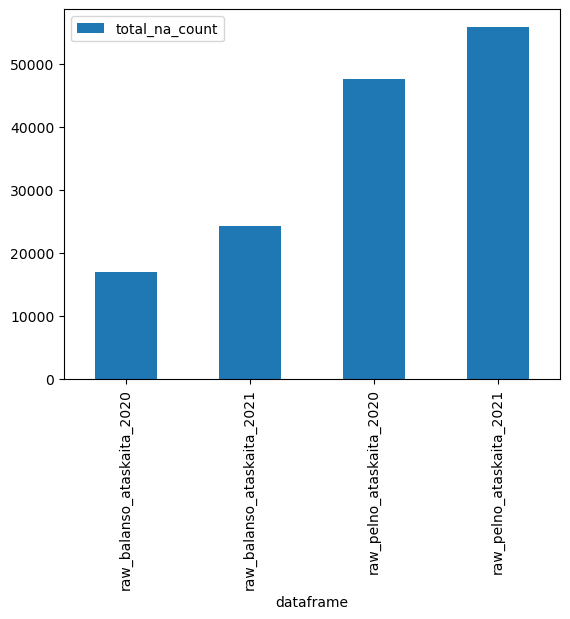

<IPython.core.display.Javascript object>

In [13]:
pd.DataFrame({
'total_na_count' : [count_na_values(raw_balanso_ataskaita_2020),
                    count_na_values(raw_balanso_ataskaita_2021),
                    count_na_values(raw_pelno_ataskaita_2020),
                    count_na_values(raw_pelno_ataskaita_2021)
                   ],
    'dataframe' : ['raw_balanso_ataskaita_2020','raw_balanso_ataskaita_2021','raw_pelno_ataskaita_2020','raw_pelno_ataskaita_2021']
}).set_index('dataframe').plot(kind='bar');


In [14]:
def get_feature_with_most_na(dataframe: pd.DataFrame) -> dict:
    return dict(dataframe.isna().sum().nlargest(1))

<IPython.core.display.Javascript object>

In [15]:
get_feature_with_most_na(raw_balanso_ataskaita_2020)

{'mok_sumos_ir_isipareigojimai': 13644}

<IPython.core.display.Javascript object>

In [16]:
get_feature_with_most_na(raw_balanso_ataskaita_2021)

{'mok_sumos_ir_isipareigojimai': 19670}

<IPython.core.display.Javascript object>

In [17]:
get_feature_with_most_na(raw_pelno_ataskaita_2020)

{'pelnas_pries_apmokestinima': 30365}

<IPython.core.display.Javascript object>

In [18]:
get_feature_with_most_na(raw_pelno_ataskaita_2021)

{'pelnas_pries_apmokestinima': 34755}

<IPython.core.display.Javascript object>

## 3.6 Ar kažkuri lentelė turi pasikartojančių duomenų?
### Ats: iš pirmo žvilgsnio nei viena lentelė neturi pasikartojančių duomenų eilučių.

In [19]:
raw_balanso_ataskaita_2020.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [20]:
raw_balanso_ataskaita_2021.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [21]:
raw_pelno_ataskaita_2020.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [22]:
raw_pelno_ataskaita_2021.duplicated().sum()

0

<IPython.core.display.Javascript object>

## 3.6.1. Kokia stulpelių aibė vienareikšmiškai identifikuoja kiekvienos lentelės eilutę?
### ATS. vienas požymių stulpelis unikaliai neidentifikuoja eilutės reikšmes. tai galime pastebėti skaičiuojant santikį unikalių " obj_kodas "  skaičiaus reikšmių padalintų iš viso duomenų masyvo eilučių skaičiaus. Detaliau pasižiūrėję į duomenis pastebime, jog vienas objekto kodas (obj_kodas) gali turėti kelis skirtingus laikotarpius (laikotarpis_nuo ir laikotarpis_iki). Norint gauti unikalią aibę, galime sujungti "obj_kodas" ir "laikotarpis_nuo" reikšmes.

<font color='red'> Erikas Švažas: 
Taip, gerai pastebėta!
</font>

In [23]:
raw_balanso_ataskaita_2020.head(3)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,305217929,"MB ""Jantaris""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2019-07-27,2019-12-31,2020-05-14,1610.0000,NaN,0.0000,1684.0000,2022-12-01
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2020-05-25,243.0000,0.0000,0.0000,243.0000,2022-12-01
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-04-22,-20442.0000,93324.0000,2619.0000,69759.0000,2022-12-01


<IPython.core.display.Javascript object>

In [24]:
len(raw_balanso_ataskaita_2020.obj_kodas.unique()) / len(raw_balanso_ataskaita_2020)

0.9062717507853797

<IPython.core.display.Javascript object>

In [25]:
len(raw_balanso_ataskaita_2021.obj_kodas.unique()) / len(raw_balanso_ataskaita_2021)

0.8835498551923873

<IPython.core.display.Javascript object>

In [26]:
len(raw_pelno_ataskaita_2021.obj_kodas.unique()) / len(raw_pelno_ataskaita_2021)

0.8887659103486442

<IPython.core.display.Javascript object>

In [27]:
len(raw_pelno_ataskaita_2020.obj_kodas.unique()) / len(raw_pelno_ataskaita_2020)

0.9132338329055228

<IPython.core.display.Javascript object>

In [28]:
raw_balanso_ataskaita_2020.obj_kodas.value_counts()

168970870    16
145496790    16
135994223    15
300603439    14
159884874    14
             ..
304756667     1
305253875     1
303166628     1
154835371     1
303778867     1
Name: obj_kodas, Length: 96353, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
raw_balanso_ataskaita_2020[raw_balanso_ataskaita_2020['obj_kodas'] == 168970870]

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
6196,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2007-01-01,2007-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
9093,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2011-01-01,2011-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
15873,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0301,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2015-01-01,2015-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
24534,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0001,Trumpa finansinė atskaitomybė,BST001,BALANSAS,2004-01-01,2004-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
34639,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0201,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2012-01-01,2012-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
34681,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0201,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2014-01-01,2014-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
35863,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2009-01-01,2009-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
44491,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2018-01-01,2018-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
53938,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2008-01-01,2008-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01
66132,168970870,"UAB ""Auremidė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0201,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2013-01-01,2013-12-31,2020-12-17,0.0000,0.0000,0.0000,0.0000,2022-12-01


<IPython.core.display.Javascript object>

In [30]:
test_2 = raw_balanso_ataskaita_2020[raw_balanso_ataskaita_2020['obj_kodas'] == 145496790]
len(test_2) == len(test_2.laikotarpis_nuo.unique())
test_2

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
11966,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2010-01-01,2010-12-31,2020-08-04,2604.0000,0.0000,0.0000,2604.0000,2022-12-01
17343,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0223,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST116,BALANSAS,2016-01-01,2016-12-31,2020-08-04,117.0000,0.0000,0.0000,117.0000,2022-12-01
24218,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0223,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST116,BALANSAS,2017-01-01,2017-12-31,2020-08-04,121.0000,0.0000,0.0000,121.0000,2022-12-01
26317,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0001,Trumpa finansinė atskaitomybė,BST001,BALANSAS,2004-01-01,2004-12-31,2020-08-04,126.0000,0.0000,0.0000,126.0000,2022-12-01
27316,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2008-01-01,2008-12-31,2020-08-04,2482.0000,0.0000,0.0000,2482.0000,2022-12-01
29709,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2007-01-01,2007-12-31,2020-08-04,2334.0000,0.0000,0.0000,2334.0000,2022-12-01
30141,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0201,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2012-01-01,2012-12-31,2020-08-04,18.0000,0.0000,0.0000,18.0000,2022-12-01
49085,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2011-01-01,2011-12-31,2020-08-04,2704.0000,0.0000,0.0000,2704.0000,2022-12-01
63021,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0101,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,2009-01-01,2009-12-31,2020-08-04,2533.0000,0.0000,0.0000,2533.0000,2022-12-01
64326,145496790,"Medžiotojų klubas ""Kurtas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0023,Pelno nesiekiančių įmonių finansinė atskaitomybė,BST016,BALANSAS,2013-01-01,2013-12-31,2020-08-04,47.0000,0.0000,0.0000,47.0000,2022-12-01


<IPython.core.display.Javascript object>

In [31]:
test_3 = raw_balanso_ataskaita_2020[raw_balanso_ataskaita_2020['obj_kodas'] == 159884874]
len(test_3) == len(test_3.laikotarpis_nuo.unique())

True

<IPython.core.display.Javascript object>

#### Unikalių aibių sukurimas ir patikrinimas

In [32]:
uniq_balanso_ataskaita_2020 = raw_balanso_ataskaita_2020.copy()
uniq_balanso_ataskaita_2020['uniq_id'] = raw_balanso_ataskaita_2020['laikotarpis_nuo'].astype(str)+'_'+raw_balanso_ataskaita_2020['obj_kodas'].astype(str)

len(uniq_balanso_ataskaita_2020.uniq_id) == len(raw_balanso_ataskaita_2020)

True

<IPython.core.display.Javascript object>

In [33]:
uniq_balanso_ataskaita_2021 = raw_balanso_ataskaita_2021.copy()
uniq_balanso_ataskaita_2021['uniq_id'] = raw_balanso_ataskaita_2021['laikotarpis_nuo'].astype(str)+'_'+raw_balanso_ataskaita_2021['obj_kodas'].astype(str)

len(uniq_balanso_ataskaita_2021.uniq_id) == len(raw_balanso_ataskaita_2021)

True

<IPython.core.display.Javascript object>

In [34]:
uniq_pelno_ataskaita_2020 = raw_pelno_ataskaita_2020.copy()
uniq_pelno_ataskaita_2020['uniq_id'] = uniq_pelno_ataskaita_2020['laikotarpis_nuo'].astype(str)+'_'+ uniq_pelno_ataskaita_2020['obj_kodas'].astype(str)

len(uniq_pelno_ataskaita_2020.uniq_id) == len(raw_pelno_ataskaita_2020)

True

<IPython.core.display.Javascript object>

In [35]:
uniq_pelno_ataskaita_2021 = raw_pelno_ataskaita_2021.copy()
uniq_pelno_ataskaita_2021['uniq_id'] = uniq_pelno_ataskaita_2021['laikotarpis_nuo'].astype(str)+ '_'+ uniq_pelno_ataskaita_2021['obj_kodas'].astype(str)

len(uniq_pelno_ataskaita_2021.uniq_id) == len(raw_pelno_ataskaita_2021)

True

<IPython.core.display.Javascript object>

## Kad būtų patogiau dirbti, sujungsiu 2021 ir 2022 metų duomenų masyvus. kad būtų patogiau identifikuoti, sukursiu papildomą požimį, nurodantį duomenų masyvo identifikavimą.

<font color='red'> Erikas Švažas: 
Šaunu, kad atlikęs operaciją patikrini ar rezultatas yra tikrai *expected*, geras sprendimas, kuris tikrai padės apsisaugoti ateityje!
</font>

In [36]:
uniq_balanso_ataskaita_2020['df_year'], uniq_balanso_ataskaita_2021['df_year'] = 2020, 2021

<IPython.core.display.Javascript object>

In [37]:
balanso_ataskaita = pd.concat([uniq_balanso_ataskaita_2020 ,uniq_balanso_ataskaita_2021]).reset_index().drop('index',axis=1)

<IPython.core.display.Javascript object>

In [38]:
len(balanso_ataskaita) == len(uniq_balanso_ataskaita_2020) + len(uniq_balanso_ataskaita_2021)

True

<IPython.core.display.Javascript object>

In [39]:
uniq_pelno_ataskaita_2020['df_year'], uniq_pelno_ataskaita_2021['df_year'] = 2020 ,2021

<IPython.core.display.Javascript object>

In [40]:
pelno_ataskaita = pd.concat([uniq_pelno_ataskaita_2020,uniq_pelno_ataskaita_2021]).reset_index().drop('index',axis=1)


<IPython.core.display.Javascript object>

In [41]:
len(pelno_ataskaita) == len(uniq_pelno_ataskaita_2020) + len(uniq_pelno_ataskaita_2021)

True

<IPython.core.display.Javascript object>

# Antra Dalis

## 4. Keletas juridinių asmenų pavadinimų yra tiesiogiai susiję su “Thermo Fisher” bendrove. Raskite pilnus šių bendrovių pavadinimus.

In [42]:
# kad būtų galima naudoti string native funkcijas, pakeičiu duomenų tipą į "String"
balanso_ataskaita['obj_pav'] = balanso_ataskaita['obj_pav'].astype(str)

<IPython.core.display.Javascript object>

In [43]:
mask = balanso_ataskaita['obj_pav'].str.contains('Thermo Fisher')
balanso_ataskaita[mask]['obj_pav'].to_list()

['UAB "Thermo Fisher Scientific Vector Holdings"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Holdings"']

<IPython.core.display.Javascript object>

<font color="red"> Erikas Švažas

Ateityje gali praversti .str.contains(case=?) argumentas

</font>

### 5. Apsimeskime, kad atributas “form_pav” neegzistuoja. Iš likusių laukelių gaukite visas UAB ir MB bendroves. Palyginkite rekonstrukcijos tikslumą su “form_pav” vertėmis - kiek procentų verčių pavyko atkurti skirtingose duomenyse?

In [44]:
def get_mb_uab_s(series: pd.Series):
    split_obj_name = series.lower().split(' ')
    if  'mb' in split_obj_name:
        return 'Mažoji bendrija' 
    elif ('mažoji' and 'bendrija') in split_obj_name :
        return 'Mažoji bendrija' 
    elif 'uab' in split_obj_name:
        return 'Uždaroji akcinė bendrovė'
    elif 'uždaroji' in split_obj_name and 'bendrovė' in split_obj_name:
        return 'Uždaroji akcinė bendrovė'
    return 'not_in_scope'
   

<IPython.core.display.Javascript object>

In [45]:
balanso_ataskaita['inf_type'] = balanso_ataskaita['obj_pav'].apply(lambda x: get_mb_uab_s(x))

<IPython.core.display.Javascript object>

In [46]:
balanso_ataskaita['inf_type'].value_counts()

Uždaroji akcinė bendrovė    158439
not_in_scope                 35847
Mažoji bendrija              32882
Name: inf_type, dtype: int64

<IPython.core.display.Javascript object>

In [47]:
result = len(balanso_ataskaita[balanso_ataskaita['inf_type'] == 'Mažoji bendrija']) / \
    len(balanso_ataskaita[balanso_ataskaita['form_pav'] == 'Mažoji bendrija']) * 100

print(f" Pavyko atkurti {round(result,2)}% Mažoji bendrija verčių")

 Pavyko atkurti 101.55% Mažoji bendrija verčių


<IPython.core.display.Javascript object>

<font color="red"> Erikas Švažas:
Puikiai, kad pastebėjote jog gali būti tiek UAB, tiek ilgasis pavadinimas (Uždaroji akcinė bendrovė). Pravartu būtų naudoti str.contains() logiką vietoje str.split().

</font>

In [48]:
result = len(balanso_ataskaita[balanso_ataskaita['inf_type'] == 'Uždaroji akcinė bendrovė']) / \
    len(balanso_ataskaita[balanso_ataskaita['form_pav'] == 'Uždaroji akcinė bendrovė']) * 100

print(f" Pavyko atkurti {round(result,2)}% Uždaroji akcinė bendrovė verčių")

 Pavyko atkurti 99.9% Uždaroji akcinė bendrovė verčių


<IPython.core.display.Javascript object>

Nepavyko gauti 100 procentų dėl pritaikytos logikos, ieškant 'mb' reikšmes, gaunamas skaičius yra didesnis, todėl, kad įtraukiami list'o elementai turintys 'mb' viduje, kaip pavyzdys galėtų būti žodis staMBbus.

tačiau kadangi paklaida yra maža, pasilieku galimybę pataisyti šį sprendimą, jei liks laiko ateityje

## 6. Apskaičiuoti vidutines reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį (2020 ir 2021 metai kartu).

In [49]:
pelno_ataskaita.groupby('form_pav').mean()['pelnas_pries_apmokestinima'].sort_values(ascending=False)

form_pav
Valstybės įmonė                             4190053.8148
Akcinė bendrovė                             2894379.1167
Komanditinė ūkinė bendrija                   329297.8571
Uždaroji akcinė bendrovė                     108121.5597
Žemės ūkio bendrovė                          106521.8961
Kooperatinė bendrovė                          46928.7250
Savivaldybės įmonė                            39780.8444
Biudžetinė įstaiga                            16242.0000
Individuali įmonė                             15008.3170
Mažoji bendrija                                7051.3261
Viešoji įstaiga                                5904.1304
Labdaros ir paramos fondas                      544.5789
Asociacija                                     -297.5732
Tikroji ūkinė bendrija                        -9874.1905
Užsienio juridinio asmens filialas         -4722950.8846
Lietuvos prekyb.,pramon. rūmų asociacija             NaN
Name: pelnas_pries_apmokestinima, dtype: float64

<IPython.core.display.Javascript object>

In [50]:
balanso_ataskaita.groupby('form_pav').mean()['nuosavas_kapitalas'].sort_values(ascending=False)

form_pav
Valstybės įmonė                            174869502.2414
Akcinė bendrovė                             41397551.5726
Savivaldybės įmonė                           3431537.4000
Užsienio juridinio asmens filialas           3368923.1875
Komanditinė ūkinė bendrija                   3251404.1649
Žemės ūkio bendrovė                          1607303.1634
Kooperatinė bendrovė                          677360.9075
Uždaroji akcinė bendrovė                      628816.0176
Tikroji ūkinė bendrija                        252825.9545
Biudžetinė įstaiga                            141074.0000
Individuali įmonė                             124624.5053
Lietuvos prekyb.,pramon. rūmų asociacija       64491.0000
Asociacija                                     36293.0271
Labdaros ir paramos fondas                     31248.6528
Viešoji įstaiga                                26212.8970
Mažoji bendrija                                15371.6683
Bendrija                                        4739.0000
Name:

<IPython.core.display.Javascript object>

## 7. Atrinkti unikalias UAB ir MB įmones, kurių “nuosavas_kapitalas” buvo didesnis negu visų UAB ir MB įmonių nuosavo kapitalo mediana už visą laitotarpį (2020 ir 2021 metai kartu)

In [51]:
# susikuriamas naujas dataset'as su subset'u, kuri sudaro tik UAB IR MB
sample_df = balanso_ataskaita[(balanso_ataskaita['form_pav'] == 'Uždaroji akcinė bendrovė') | (balanso_ataskaita['form_pav'] == 'Mažoji bendrija') ]
# surandama UAB ir MB mediana
nuosavo_kapitalo_mediana = sample_df['nuosavas_kapitalas'].median()

<IPython.core.display.Javascript object>

<font color="red"> Erikas Švažas:
str.contains() būtų alternatyva ir šiam kartui: 
```
.str.contains('Uždaroji akcinė bendrovė|Mažoji bendrija', regex=True )
````
Prieš skaičiuojant descriptive stats būtų naudinga patikrinti ar nėra duplicates.
</font>

In [52]:
nuosavo_kapitalo_mediana

13788.0

<IPython.core.display.Javascript object>

In [53]:
mask = sample_df['nuosavas_kapitalas'] > nuosavo_kapitalo_mediana

unique_company_list = sample_df[mask]['obj_pav'].unique().tolist()

len(unique_company_list)

52285

<IPython.core.display.Javascript object>

In [54]:
# atkomentavę ir paleidę žemiau esančią kodo eilutę, gausite sąrašą visų įmonių

# unique_company_list

<IPython.core.display.Javascript object>

## 8. Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę). Patikrinkite įmonių patenkančių į TOP-10 vertes rekvizitai.vz.lt svetainėje. Ranka įrašomi duomenys sukuria klaidos galimybę. Ar yra bendrovė, kurios “nuosavas_kapitalas” jums kelia įtarimų?

In [55]:
# skaičiuojant percentilę, panaikinsiu nežinomas reikšmes.

temp_arr = balanso_ataskaita['nuosavas_kapitalas'].dropna()

<IPython.core.display.Javascript object>

<font color='red'> Erikas Švažas:

Patarimas ateityje panaikinti (peržiūrėti) ir dublikatus.
Smagiai ir efektyviai panaudotas filtravimas maskais!

Dėl galutinių išvadų -> yes, sutampa. Tačiau įdomu, kad skalė yra ypač didelė ir net galima palyginti su visu LT biudžetu.

</font>


In [56]:
perc_99 = np.percentile(temp_arr, 99)
perc_99

6360620.000000028

<IPython.core.display.Javascript object>

In [57]:
mask = balanso_ataskaita.groupby(['obj_pav','df_year']).mean()['nuosavas_kapitalas'] > perc_99

balanso_ataskaita.groupby(['obj_pav','df_year']).mean()['nuosavas_kapitalas'][mask].sort_values(ascending=False).head(10)

obj_pav                                                   df_year
UAB "Thermo Fisher Scientific Vector Holdings"            2021      3898038496.0000
UAB "Thermo Fisher Scientific Vector Senior Holdings I"   2021      3898038337.0000
UAB "Thermo Fisher Scientific Vector Senior Holdings II"  2021      2950792636.0000
Valstybės įmonė Lietuvos automobilių kelių direkcija      2021      2693140000.0000
Uždaroji akcinė bendrovė "Vilniaus prekyba"               2021      1950511000.0000
AB "Ignitis grupė"                                        2021      1812955000.0000
Uždaroji akcinė bendrovė "Vilniaus prekyba"               2020      1658114000.0000
MAXIMA GRUPĖ UAB                                          2021      1564631000.0000
                                                          2020      1459354000.0000
UAB "Thermo Fisher Scientific Vector Senior Holdings I"   2020      1340595977.0000
Name: nuosavas_kapitalas, dtype: float64

<IPython.core.display.Javascript object>

1. Thermo Fisher Scientific Vector Holdings 2020 metais -> sutampa
2. UAB "Thermo Fisher Scientific Vector Senior Holdings I" 2020 metais -> sutampa
3. UAB "Thermo Fisher Scientific Vector Senior Holdings II"  2020 metais -> sutampa
4. Valstybės įmonė Lietuvos automobilių kelių direkcija 2020 metais -> sutampa
5. Uždaroji akcinė bendrovė "Vilniaus prekyba" 2020 metai -> sutampa
6. AB "Ignitis grupė" 2020 metai -> sutampa
7. Uždaroji akcinė bendrovė "Vilniaus prekyba" 2019 metai -> sutampa
8. MAXIMA GRUPĖ UAB 2020 metai -> sutampa
9. MAXIMA GRUPĖ UAB 2019 metai -> sutampa
10. UAB "Thermo Fisher Scientific Vector Senior Holdings I" 2019 metai -> sutampa  
  
Visos top 10 įmonių nuosavas kapitalas sutampa su nuosavu kapitalu, nurodytu rekvizitai.lt. būtų itin keista, jei būtų kitaip. :)


## 9. Vizualiai atvaizduoti juridinių asmenų formos pasiskirstymą per visą laikotarpį (2020 ir 2021 metais kartu). Vizualizacijos turi sutapti su pavaizduota dešinėje

In [58]:
kiekis = balanso_ataskaita.groupby(['form_pav','df_year']).count()['obj_kodas'].reset_index()
kiekis

,form_pav,df_year,obj_kodas
0,Akcinė bendrovė,2020,245
1,Akcinė bendrovė,2021,238
2,Asociacija,2020,9073
3,Asociacija,2021,9841
4,Bendrija,2020,1
5,Biudžetinė įstaiga,2020,2
6,Individuali įmonė,2020,677
7,Individuali įmonė,2021,1372
8,Komanditinė ūkinė bendrija,2020,39
9,Komanditinė ūkinė bendrija,2021,60


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='form_pav', ylabel='obj_kodas'>

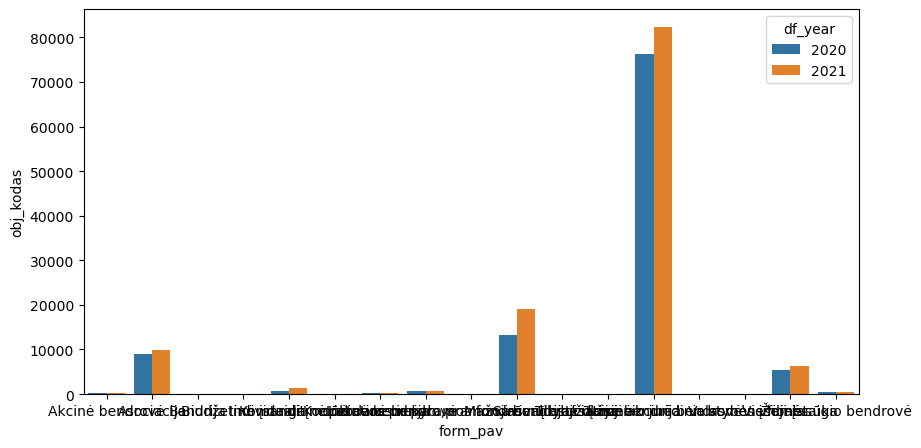

<IPython.core.display.Javascript object>

In [59]:
fig = plt.figure(figsize = (10, 5))

sns.barplot(data=kiekis, x='form_pav', y='obj_kodas', hue='df_year')

## 10. Kurį mėnesį buvo įregistruota daugiausiai juridinių asmenų 2020 ir 2021 metais? Atvaizduokite stulpelinę diagramą.

In [60]:
# pakeičiu duomenų tipą į datetime
balanso_ataskaita['reg_date'] = pd.to_datetime(balanso_ataskaita['reg_date'])

<IPython.core.display.Javascript object>

In [61]:
# susikuriu nauja stulpeli, pagal kuri butu galima agreguoti duomenis
balanso_ataskaita['reg_year_month'] = balanso_ataskaita['reg_date'].dt.strftime('%Y-%m')

<IPython.core.display.Javascript object>

In [62]:

grpd_data =  balanso_ataskaita.groupby(['reg_year_month']).count()['form_pav'].reset_index()


<IPython.core.display.Javascript object>

In [63]:
grpd_data

,reg_year_month,form_pav
0,2020-01,2477
1,2020-02,4418
2,2020-03,8656
3,2020-04,12417
4,2020-05,33053
5,2020-06,20815
6,2020-07,7149
7,2020-08,3844
8,2020-09,4471
9,2020-10,3018


<IPython.core.display.Javascript object>

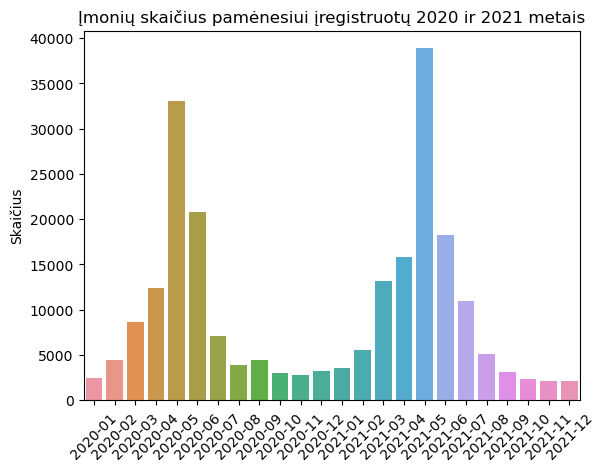

<IPython.core.display.Javascript object>

In [64]:
plot = sns.barplot(grpd_data, x='reg_year_month', y='form_pav')
plt.title('Įmonių skaičius pamėnesiui įregistruotų 2020 ir 2021 metais')
plot.set(xlabel=None, ylabel='Skaičius')
plt.xticks(rotation = 45);


## 11. Vizualiai atvaizduoti juridinių asmenų statuso pasiskirstymą kiekvienais metais

In [65]:
balanso_ataskaita.groupby(['stat_statusas','df_year']).count()['stat_pav']

stat_statusas  df_year
0              2020       101084
               2021       116097
1              2020           78
               2021          186
2              2020           43
               2021           41
3              2020           56
               2021           84
4              2020           45
               2021           50
5              2020          374
               2021          339
6              2020           38
               2021           77
7              2020          857
               2021          992
8              2020           27
               2021           25
9              2020          275
               2021          352
10             2020         2862
               2021         2108
23             2020            6
               2021            6
24             2020            2
               2021            4
26             2020          571
               2021          489
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [66]:
hist_df = balanso_ataskaita.groupby(['stat_statusas','df_year']).count()['stat_pav'].reset_index(name='count')
hist_df

,stat_statusas,df_year,count
0,0,2020,101084
1,0,2021,116097
2,1,2020,78
3,1,2021,186
4,2,2020,43
5,2,2021,41
6,3,2020,56
7,3,2021,84
8,4,2020,45
9,4,2021,50


<IPython.core.display.Javascript object>

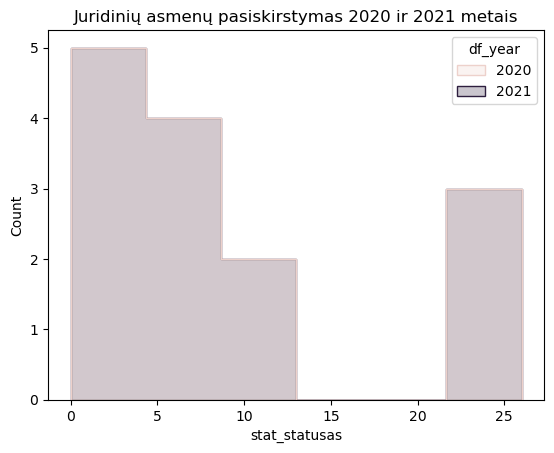

<IPython.core.display.Javascript object>

In [67]:
hist = sns.histplot(data=hist_df, x="stat_statusas", hue='df_year', element='step');
hist.set(title='Juridinių asmenų pasiskirstymas 2020 ir 2021 metais');



Iš histogramos matome, jog abejais metais pasiskirstymas yra itin panašus.

## 12.  Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis stulpelinėje diagramoje

In [68]:
merged_df = balanso_ataskaita.merge(pelno_ataskaita, on='uniq_id', how='left')

<IPython.core.display.Javascript object>

In [69]:
# grupuojant gaunamas nuosavo kapitalo vidurkis kiekvienai unikaliai įmonei kiekvienais metais (taip panaikinami įmonių pavadinimų pasikartojimai, turintys skirtinas nuosavo_kapitalo reikšmes)

balanso_ataskaita_nuosavas_kapitalas_vid = balanso_ataskaita.groupby(['obj_pav','df_year']).mean()['nuosavas_kapitalas'].reset_index(name='nuosavo_kapitalo_vidurkis')
balanso_ataskaita_nuosavas_kapitalas_vid

,obj_pav,df_year,nuosavo_kapitalo_vidurkis
0,"""10 liepų"" UAB",2020,9911.0000
1,"""10 liepų"" UAB",2021,144709.0000
2,"""1024 MB"" MB",2020,-193.0000
3,"""1024 MB"" MB",2021,30170.0000
4,"""115 idėjų"" MB",2020,4173.0000
...,...,...,...
201213,"Žūklės klubas ""Lures LT""",2020,0.0000
201214,"Žūklės klubas ""Lures LT""",2021,0.0000
201215,"Žūklės klubas ""Merkys""",2021,4507.0000
201216,"Žūklės klubas ""Paltusas""",2021,0.0000


<IPython.core.display.Javascript object>

In [70]:
pelno_ataskaita_grynasis_pelnas_vid = pelno_ataskaita.groupby(['obj_pav','df_year']).mean()['grynasis_pelnas'].reset_index(name='grynojo_pelno_vidurkis')
pelno_ataskaita_grynasis_pelnas_vid

,obj_pav,df_year,grynojo_pelno_vidurkis
0,"""10 liepų"" UAB",2020,-89.0000
1,"""10 liepų"" UAB",2021,-65202.0000
2,"""1024 MB"" MB",2020,35.0000
3,"""1024 MB"" MB",2021,30363.0000
4,"""115 idėjų"" MB",2020,3563.0000
...,...,...,...
184301,ŽŪB Žadžiūnų ekologinis ūkis,2021,-15801.0000
184302,ŽŪB Želsvelės ekologinis ūkis,2021,-1624.5000
184303,"ŽŪĮ ""GERAS ŪKIS"" UAB",2020,-116756.0000
184304,"ŽŪĮ ""GERAS ŪKIS"" UAB",2021,90858.0000


<IPython.core.display.Javascript object>

In [71]:
# inner join palieka tik tas įmones, kurios yra minimos abiejuose duomenų masyvuose.
sujungtos_ataskaitos = balanso_ataskaita_nuosavas_kapitalas_vid.merge(pelno_ataskaita_grynasis_pelnas_vid, on=['obj_pav', 'df_year'], how='inner')

sujungtos_ataskaitos.shape

(184306, 4)

<IPython.core.display.Javascript object>

In [72]:
sujungtos_ataskaitos['kapitalo_pelno_suma'] = sujungtos_ataskaitos['nuosavo_kapitalo_vidurkis'] + sujungtos_ataskaitos['grynojo_pelno_vidurkis']

<IPython.core.display.Javascript object>

In [73]:
def get_tendency(dataframe):
    imoniu_pav = dataframe.obj_pav.unique().tolist()
    dict_ = {}
    for name in imoniu_pav:
        # print(name)
        try:
            temp_df = dataframe[dataframe['obj_pav'] == name ].reset_index()
            if (temp_df['kapitalo_pelno_suma'][1] - temp_df['kapitalo_pelno_suma'][0] ) > 0:
                result = ('Teigiama tendencija')
            if  (temp_df['kapitalo_pelno_suma'][1] - temp_df['kapitalo_pelno_suma'][0] ) < 0: 
                result = ('Neigiama tendencija')
            if (temp_df['kapitalo_pelno_suma'][1] - temp_df['kapitalo_pelno_suma'][0] ) == 0:
                result =('Pokyčio nebuvo')
               
        except:
            result = ('Truksta duomenu')
        dict_.update({name:result})
    return dict_
      
    


<IPython.core.display.Javascript object>

In [74]:
# tai tikrai nėra pats optimaliausias sprendimas (užtruka ~15 minučių kol sukuriamas rinkinys), tačiau veikia kuo puikiausiai :) 

# del sios priezasties, uzkomentuoju apacioje esanti koda, tačiau išsaugau gautą duomenų rinkinį su priskirtu nauju požymiu.

# dict_for_mapping = get_tendency(sujungtos_ataskaitos)
# sujungtos_ataskaitos["tendencija"] = sujungtos_ataskaitos["obj_pav"].map(dict_for_mapping)
# # sujungtos_ataskaitos.to_csv('bendras_duomenu_rinkinys_su_tendencija.csv')

<IPython.core.display.Javascript object>

In [75]:
# sukurtame rinkinyje yra 106702 unikalios reikšmės, kurių skaičius sutampa su unikaliais įmonių pavadinimais pagrindiniame duomenų rinkinyje.

# len(dict_for_mapping) == sujungtos_ataskaitos['obj_pav'].unique().size

<IPython.core.display.Javascript object>

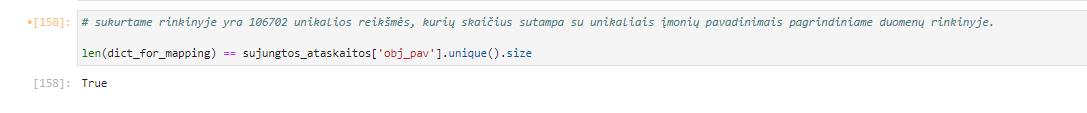

In [76]:
sujungtos_ataskaitos = pd.read_csv('bendras_duomenu_rinkinys_su_tendencija.csv', index_col=False).drop('Unnamed: 0',axis=1)

<IPython.core.display.Javascript object>

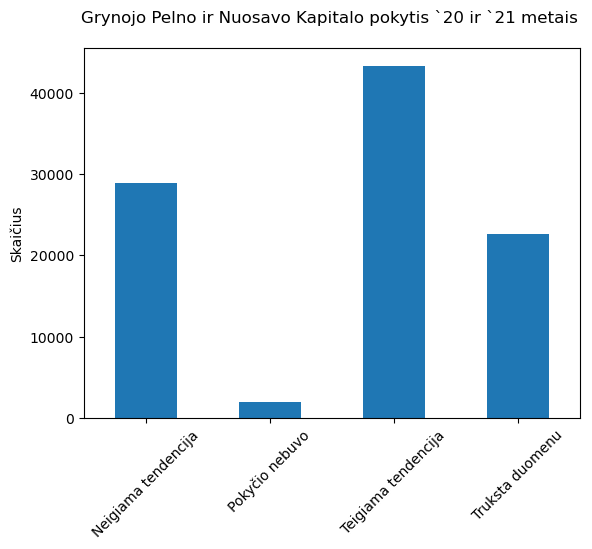

<IPython.core.display.Javascript object>

In [77]:
sujungtos_ataskaitos[sujungtos_ataskaitos['df_year'] == 2021].groupby('tendencija').count()['obj_pav'].plot(kind='bar')
plt.title('Grynojo Pelno ir Nuosavo Kapitalo pokytis `20 ir `21 metais \n')
plt.xlabel("")
plt.ylabel('Skaičius')
plt.xticks(rotation = 45);

## 13. Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Toliau veiklą vykdanti įmonė pažymėta "Teisinis stat neįregistruotas" statusu. Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis.

### Ats 1. Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo.
    'UAB "Kesko Senukai Digital"',
    'Uždaroji akcinė bendrovė "Agrovet"',
    'Uždaroji akcinė bendrovė "Saulenė"',
     'Uždaroji akcinė bendrovė "Pušis"'

In [78]:
# susikursiu du subset'us, kuriuose bus tik UAB ir MB imones, kad dirbti butu paprasciau
mask_balanso = (balanso_ataskaita['form_pav'] == 'Mažoji bendrija') | (balanso_ataskaita['form_pav'] == 'Uždaroji akcinė bendrovė')

balanso_mb_uab_subset = balanso_ataskaita[mask_balanso].copy()
balanso_mb_uab_subset.shape

(190979, 22)

<IPython.core.display.Javascript object>

In [79]:
mask_pelno = (pelno_ataskaita['form_pav'] == 'Mažoji bendrija') | (pelno_ataskaita['form_pav'] == 'Uždaroji akcinė bendrovė')

pelno_mb_uab_subset = pelno_ataskaita[mask_pelno].copy()
pelno_mb_uab_subset.shape

(190976, 19)

<IPython.core.display.Javascript object>

In [80]:
balanso_mb_uab_subset.stat_pav.value_counts()

Teisinis stat neįregistruotas    182234
Išregistruotas                     4344
Likviduojamas                      1544
Likviduojamas dėl bankroto         1029
Bankrutuojantis                     689
Inicijuojamas likvidavimas          536
Reorganizuojamas                    142
Pertvarkomas                        120
Bankrutavęs                         106
Restruktūrizuojamas                  93
Dalyvaujantis reorganizavime         74
Dalyvaujantis atskyrime              50
JA jung peržengiant 1 valst          12
JA dal 1 valst ribas jung             6
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [81]:
pelno_mb_uab_subset.stat_pav.value_counts()

Teisinis stat neįregistruotas    182232
Išregistruotas                     4344
Likviduojamas                      1543
Likviduojamas dėl bankroto         1029
Bankrutuojantis                     689
Inicijuojamas likvidavimas          536
Reorganizuojamas                    142
Pertvarkomas                        120
Bankrutavęs                         106
Restruktūrizuojamas                  93
Dalyvaujantis reorganizavime         74
Dalyvaujantis atskyrime              50
JA jung peržengiant 1 valst          12
JA dal 1 valst ribas jung             6
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [82]:
#susikursiu binariny "bankrutavęs" stulpelį kiekviename iš duomenų masyvų. tai padės filtruoti ir lyginti reikšmes skirtingais metais

<IPython.core.display.Javascript object>

In [83]:
def is_bankrupt(dataframe):
    bankroto_pav = ["Bankrutavęs", "Bankrutuojantis" ,"Išregistruotas","Inicijuojamas likvidavimas","Likviduojamas","Likviduojamas dėl bankroto"]
    
    if dataframe['stat_pav'] in bankroto_pav:
        return 1
    return 0

balanso_mb_uab_subset['yra_bankrutaves'] = balanso_mb_uab_subset.apply(is_bankrupt, axis=1)

<IPython.core.display.Javascript object>

In [84]:
balanso_mb_uab_subset[balanso_mb_uab_subset['yra_bankrutaves'] == 1]['stat_pav'].value_counts()

Išregistruotas                4344
Likviduojamas                 1544
Likviduojamas dėl bankroto    1029
Bankrutuojantis                689
Inicijuojamas likvidavimas     536
Bankrutavęs                    106
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [85]:
balanso_mb_uab_subset[balanso_mb_uab_subset['yra_bankrutaves'] != 1]['stat_pav'].value_counts()

Teisinis stat neįregistruotas    182234
Reorganizuojamas                    142
Pertvarkomas                        120
Restruktūrizuojamas                  93
Dalyvaujantis reorganizavime         74
Dalyvaujantis atskyrime              50
JA jung peržengiant 1 valst          12
JA dal 1 valst ribas jung             6
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [86]:
pelno_mb_uab_subset['yra_bankrutaves'] = pelno_mb_uab_subset.apply(is_bankrupt,axis=1)

<IPython.core.display.Javascript object>

In [87]:
pelno_mb_uab_subset[pelno_mb_uab_subset['yra_bankrutaves'] == 1]['stat_pav'].value_counts().sum()

8247

<IPython.core.display.Javascript object>

In [88]:
pelno_mb_uab_subset[pelno_mb_uab_subset['yra_bankrutaves'] != 1]['stat_pav'].value_counts()

Teisinis stat neįregistruotas    182232
Reorganizuojamas                    142
Pertvarkomas                        120
Restruktūrizuojamas                  93
Dalyvaujantis reorganizavime         74
Dalyvaujantis atskyrime              50
JA jung peržengiant 1 valst          12
JA dal 1 valst ribas jung             6
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [89]:
def bankrutavo_2021(dataframe):
    if (dataframe['df_year'] == 2021 and dataframe['yra_bankrutaves'] == 1):
        return 1
    return 0
def vykde_veikla_2020(dataframe):
    if (dataframe['df_year'] == 2020 and dataframe['yra_bankrutaves'] == 0):
        return 1
    return 0


<IPython.core.display.Javascript object>

In [90]:
balanso_mb_uab_subset['bankrutavo_2021'] =balanso_mb_uab_subset.apply(bankrutavo_2021, axis=1)
balanso_mb_uab_subset['vykde_veikla_2020'] = balanso_mb_uab_subset.apply(vykde_veikla_2020,axis=1)

pelno_mb_uab_subset['bankrutavo_2021'] =pelno_mb_uab_subset.apply(bankrutavo_2021, axis=1)
pelno_mb_uab_subset['vykde_veikla_2020'] = pelno_mb_uab_subset.apply(vykde_veikla_2020,axis=1)

<IPython.core.display.Javascript object>

In [91]:
balanso_mb_uab_subset[(balanso_mb_uab_subset['bankrutavo_2021'] ==0 ) & (balanso_mb_uab_subset['vykde_veikla_2020'] == 1)]['stat_pav'].value_counts()

Teisinis stat neįregistruotas    84948
Reorganizuojamas                    70
Pertvarkomas                        46
Restruktūrizuojamas                 44
Dalyvaujantis reorganizavime        39
Dalyvaujantis atskyrime             26
JA jung peržengiant 1 valst          6
JA dal 1 valst ribas jung            2
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [92]:
balanso_mb_uab_subset[(balanso_mb_uab_subset['bankrutavo_2021'] ==1 )]['stat_pav'].value_counts()

Išregistruotas                1857
Likviduojamas                  826
Likviduojamas dėl bankroto     476
Bankrutuojantis                325
Inicijuojamas likvidavimas     309
Bankrutavęs                     70
Name: stat_pav, dtype: int64

<IPython.core.display.Javascript object>

In [93]:
vykde_veikla_2020_list = balanso_mb_uab_subset[balanso_mb_uab_subset['vykde_veikla_2020'] == 1]['obj_pav'].unique().tolist()
bankrutavo_2021_list = balanso_mb_uab_subset[balanso_mb_uab_subset['bankrutavo_2021'] == 1]['obj_pav'].unique().tolist()

<IPython.core.display.Javascript object>

In [94]:
atsakymas = [i for i in vykde_veikla_2020_list if i in bankrutavo_2021_list]

<IPython.core.display.Javascript object>

In [95]:
atsakymas

['UAB "Kesko Senukai Digital"',
 'Uždaroji akcinė bendrovė "Agrovet"',
 'Uždaroji akcinė bendrovė "Saulenė"',
 'Uždaroji akcinė bendrovė "Pušis"']

<IPython.core.display.Javascript object>

### 13.2 Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis
### ats: 13.2
* bankrutavusių įmonių “nuosavas_kapitalas” suma 2021 metais = 452059119.80654764
* bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais = -139702616.41369045 
* veikiančių įmonių “nuosavas_kapitalas” suma 2021 metais = 54547149970.47768
* veikiančių įmonių “grynasis_pelnas” suma 2021 metais = 5278014541.534724

lyginant sumas, matome, kad grynasis pelnas turi itin didelę įtaką. :)

In [96]:
# išsirenku tik bankrutavusias įmones 2021 metais, kadangi įrašai pasikartoja, o ties kiekvienu įrašu nuosavas įmonės kapiatalas skiriasi - imu vidurkį. kurį susumuoju.

balanso_mb_uab_subset[balanso_mb_uab_subset['bankrutavo_2021'] == 1].groupby('obj_pav').mean()['nuosavas_kapitalas'].sum()

452059119.80654764

<IPython.core.display.Javascript object>

In [97]:
# taip pat, tik su pelnu
pelno_mb_uab_subset[(pelno_mb_uab_subset['bankrutavo_2021'] == 1)].groupby('obj_pav').mean()['grynasis_pelnas'].sum()

-139702616.41369045

<IPython.core.display.Javascript object>

In [98]:
balanso_mb_uab_subset[(balanso_mb_uab_subset['bankrutavo_2021'] == 0
                      ) & (balanso_mb_uab_subset['df_year'] == 2021
                          ) & (balanso_mb_uab_subset['stat_pav'] == "Teisinis stat neįregistruotas" )].groupby('obj_pav').mean()['nuosavas_kapitalas'].sum()

54547149970.47768

<IPython.core.display.Javascript object>

In [99]:
pelno_mb_uab_subset[(pelno_mb_uab_subset['bankrutavo_2021'] == 0
                      ) & (pelno_mb_uab_subset['df_year'] == 2021
                          ) & (pelno_mb_uab_subset['stat_pav'] == "Teisinis stat neįregistruotas" )].groupby('obj_pav').mean()['grynasis_pelnas'].sum()

5278014541.534724

<IPython.core.display.Javascript object>

### 14. Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas”.
    a. Suskirstyti įmones į 5 grupes pagal lauką “turtas”.
    b. Palyginti kaip šios grupės keičiasi 2020 ir 2021 metais. Palyginimą atvaizduoti skrituline diagrama ir gauti tokį patį kaip apačioje pavaizduotas paveikslas (skaitinės reikšmės gali skirtis):
        i. naudojantis matplotlib funkcionalumu.
        ii. naudojantis pandas funkcionalumu.


In [100]:
balanso_ataskaita['turtas'] = balanso_ataskaita['ilgalaikis_turtas'] + balanso_ataskaita['trumpalaikis_turtas']

<IPython.core.display.Javascript object>

In [101]:
# kadangi turime pasikartojančias įmones, surasiu unikalias įmonių turto vidurkio reikšmes `20 ir `21 metais

plot_turtas = balanso_ataskaita.groupby(['obj_pav','df_year']).mean()['turtas'].unstack().reset_index()
plot_turtas

df_year,obj_pav,2020,2021
0,"""10 liepų"" UAB",1115546.0000,1080582.0000
1,"""1024 MB"" MB",42704.0000,83247.0000
2,"""115 idėjų"" MB",4629.0000,NaN
3,"""2 Mo"" UAB",NaN,0.0000
4,"""21 kapitalas"" UAB",NaN,2500.0000
...,...,...,...
116015,"Žūklės klubas ""Fideris""",661.0000,638.0000
116016,"Žūklės klubas ""Lures LT""",NaN,NaN
116017,"Žūklės klubas ""Merkys""",NaN,4507.0000
116018,"Žūklės klubas ""Paltusas""",NaN,648.5000


<IPython.core.display.Javascript object>

In [102]:
bins = [1,3_000, 20_000, 35_000, 70_000, 100_000]
category = ['iki 3k', '3k - 20k', '20k-35k', '35k-70k', '70k+']
plot_turtas['20_cut'] = pd.cut(plot_turtas[2020], bins, labels=category)
plot_turtas['21_cut'] = pd.cut(plot_turtas[2021], bins, labels=category)


<IPython.core.display.Javascript object>

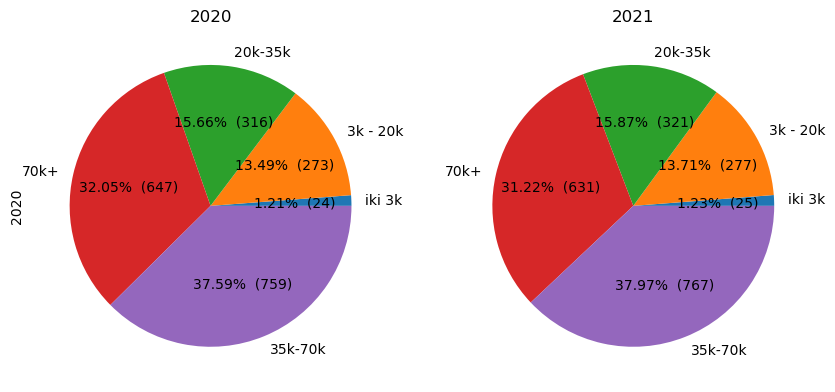

<IPython.core.display.Javascript object>

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))

# is stack overflow:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt_20 = plot_turtas.groupby('20_cut').sum()[2020].sort_values().plot(kind='pie', autopct=make_autopct([2020]), title='2020', ax=ax1)

plt_21 = plot_turtas.groupby('21_cut').sum()[2021].sort_values().plot(kind='pie', autopct=make_autopct([2021]), title='2021',ax=ax2)



plt.ylabel('');

## 15. Rasti TOP-100 pelningiausių įmonių pagal “grynasis pelnas” ir TOP-100 įmonių kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose?

In [206]:
top_100_nuosavas_kapitalas = balanso_ataskaita.groupby('obj_pav').mean()['nuosavas_kapitalas'
                                                                       ].nlargest(100
                                                                                 ).sort_values(ascending=False
                                                                                              ).reset_index()['obj_pav'
                                                                                                             ].tolist()
top_100_grynasis_pelnas = pelno_ataskaita.groupby('obj_pav').mean()['grynasis_pelnas'
                                                                  ].nlargest(100
                                                                            ).sort_values(ascending=False
                                                                                         ).reset_index()['obj_pav'
                                                                                                        ].tolist()

<IPython.core.display.Javascript object>

In [207]:
set(top_100_nuosavas_kapitalas).intersection(set(top_100_grynasis_pelnas))

{'AB "Amber Grid"',
 'AB "Energijos skirstymo operatorius"',
 'AB "Ignitis gamyba"',
 'AB "Ignitis grupė"',
 'AB "LTG Infra"',
 'AB DFDS Seaways',
 'AB Vilniaus šilumos tinklai',
 'Akcinė bendrovė "Achema"',
 'Akcinė bendrovė "Invalda INVL"',
 'Akcinė bendrovė "Kauno grūdai"',
 'Akcinė bendrovė "LIFOSA"',
 'Akcinė bendrovė "Lietuvos geležinkeliai"',
 'Akcinė bendrovė "ŽEMAITIJOS PIENAS"',
 'Circle K Lietuva UAB',
 'GALIO GROUP UAB',
 'LITGRID AB',
 'MAXIMA LT UAB',
 'NDX Group UAB',
 'Telia Lietuva AB',
 'UAB "Bitė Lietuva"',
 'UAB "ERA Family"',
 'UAB "IN Group"',
 'UAB "Lidl Lietuva"',
 'UAB "ME investicija"',
 'UAB "Panorama LT"',
 'UAB "SANITEX"',
 'UAB "TELE2"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Trust Capital"',
 'UAB "VG HOLDING"',
 'UAB "Yukon Advanced Optics Worldwide"',
 'UAB Teva Baltics',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'UŽDAROJI AKCINĖ BENDROVĖ "LIETPAK"',
 'Uždaroji akcinė bendrovė "BALTISCHES HAUS"',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"'

<IPython.core.display.Javascript object>

In [208]:
top_companies = [i for i in top_100_nuosavas_kapitalas if i in top_100_grynasis_pelnas ]
len(top_companies)

41

<IPython.core.display.Javascript object>

In [209]:
# sutampančios įmonės
top_companies

['AB "Ignitis grupė"',
 'Akcinė bendrovė "Lietuvos geležinkeliai"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'AB "LTG Infra"',
 'AB "Energijos skirstymo operatorius"',
 'Valstybės įmonė Klaipėdos valstybinio jūrų uosto direkcija',
 'AB "Ignitis gamyba"',
 'UAB "ME investicija"',
 'MAXIMA LT UAB',
 'Telia Lietuva AB',
 'Akcinė bendrovė "Achema"',
 'UAB "Bitė Lietuva"',
 'UAB Teva Baltics',
 'AB DFDS Seaways',
 'LITGRID AB',
 'Uždaroji akcinė bendrovė "NEO GROUP"',
 'UAB "Lidl Lietuva"',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'GALIO GROUP UAB',
 'UAB "TELE2"',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"',
 'Akcinė bendrovė "LIFOSA"',
 'Uždaroji akcinė bendrovė "BALTISCHES HAUS"',
 'UAB "SANITEX"',
 'AB "Amber Grid"',
 'Valstybės įmonė Lietuvos oro uostai',
 'UAB "VG HOLDING"',
 'UAB "Panorama LT"',
 'NDX Group UAB',
 'AB Vilniaus šilumos tinklai',
 'UAB "IN Group"',
 'UŽDAROJI AKCINĖ BENDROVĖ "LIETPAK"',
 'Uždaroji akcinė bendrovė "RIVONA"',
 'UAB "ERA Family"',
 'Akcinė bendrovė

<IPython.core.display.Javascript object>

## 16. Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020 ir 2021 metais? Kurios įmonės iškrenta iš TOP sąrašo 2021 metais? 
### 16.1. Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020 ir 2021 metais? 
#### TOP 100 įmonės 2020 metais, kurios nėra Tarp TOP 100 pelningiausių 2021/2022 kartu:
     'UAB "Avion Express"',
     'UAB "GetJet Airlines"',
     'AB "BALTIC SHOPPING CENTERS"',
     'UAB "Green Genius"',
     'UAB "Sorensen Invest"',
     'UAB LIVE SQUARE LT',
     'AB "Amber Grid"',
     'Uždarojo tipo informuotiesiems investuotojams skirta investicinė bendrovė UAB "LIM Verslo Trikampio NT Fondas"',
     'UAB "Inter Krasta"',
     'UAB "Klaško"',
     'UAB "HEKON"',
     '4Wind UAB',
     'UAB "Vilniaus aidai"',
     'UAB "SPECTATOR"',
     'Baltic Champs Group UAB',
     'Atvirojo tipo Informuotiesiems investuotojams skirta investicinė kintamojo kapitalo bendrovė "Mūsų ateities investicijos"',
     'MD PARTNERS UAB',
     'UAB "EBV Finance"',
     'MG investment UAB',
     'UAB "K29"',
     'Uždaroji akcinė bendrovė "NESTE LIETUVA"',
     'UAB "Biosantara"
#### TOP 100 įmonės 2021 metais, kurios nėra Tarp TOP 100 pelningiausių 2020/2021 kartu:
      'UAB "Skyroad Leasing"',
     'AviaAM Leasing Service Centre AB',
     'UAB "Magnus Investments"',
     'UAB AR Finance',
     'Uždaroji akcinė bendrovė "VILBRA"',
     'IKI Lietuva UAB',
     'Akcinė bendrovė "Invalda privatus kapitalas"',
     'UAB "BFIII G1"',
     'UAB "Agrokoncerno grūdai"',
     'UAB "BIOTECHA"',
     'UAB "Egilora"',
     'Uždaroji akcinė bendrovė "IMMOBILITAS"',
     'Uždaroji akcinė bendrovė "TRANSIMEKSA"',
     'Uždaroji akcinė bendrovė "Ryterna"',
     'UAB "Nordcurrent Group"',
     'Informuotiesiems investuotojams skirta uždarojo tipo investicinė UAB "Baltic Retail Properties"',
     'AB "Modus Energy"',
     'Littelfuse LT UAB',
     'UAB "Sonex consulting"',
     'UAB "Ingka Investments Lithuania"',
     'Uždaroji akcinė bendrovė "RIMI LIETUVA"

In [200]:
pelningiausios_2020 = pelno_ataskaita[pelno_ataskaita['df_year'] == 2020].groupby('obj_pav').sum()['grynasis_pelnas'
                                                                  ].nlargest(100
                                                                            ).sort_values(ascending=False
                                                                                         ).reset_index()['obj_pav'].tolist()
pelningiausios_2020 = pelno_ataskaita[pelno_ataskaita['df_year'] == 2021].groupby('obj_pav').sum()['grynasis_pelnas'
                                                                  ].nlargest(100
                                                                            ).sort_values(ascending=False
                                                                                         ).reset_index()['obj_pav'].tolist()

<IPython.core.display.Javascript object>

In [110]:
# pelningiausios_2020

<IPython.core.display.Javascript object>

In [111]:
#pelningiausios_2021

<IPython.core.display.Javascript object>

In [112]:
[i for i in pelningiausios_2020 if i not in top_100_grynasis_pelnas]

['UAB "Avion Express"',
 'UAB "GetJet Airlines"',
 'AB "BALTIC SHOPPING CENTERS"',
 'UAB "Green Genius"',
 'UAB "Sorensen Invest"',
 'UAB LIVE SQUARE LT',
 'AB "Amber Grid"',
 'Uždarojo tipo informuotiesiems investuotojams skirta investicinė bendrovė UAB "LIM Verslo Trikampio NT Fondas"',
 'UAB "Inter Krasta"',
 'UAB "Klaško"',
 'UAB "HEKON"',
 '4Wind UAB',
 'UAB "Vilniaus aidai"',
 'UAB "SPECTATOR"',
 'Baltic Champs Group UAB',
 'Atvirojo tipo Informuotiesiems investuotojams skirta investicinė kintamojo kapitalo bendrovė "Mūsų ateities investicijos"',
 'MD PARTNERS UAB',
 'UAB "EBV Finance"',
 'MG investment UAB',
 'UAB "K29"',
 'Uždaroji akcinė bendrovė "NESTE LIETUVA"',
 'UAB "Biosantara"']

<IPython.core.display.Javascript object>

In [113]:
[i for i in pelningiausios_2021 if i not in top_100_grynasis_pelnas]

['UAB "Skyroad Leasing"',
 'AviaAM Leasing Service Centre AB',
 'UAB "Magnus Investments"',
 'UAB AR Finance',
 'Uždaroji akcinė bendrovė "VILBRA"',
 'IKI Lietuva UAB',
 'Akcinė bendrovė "Invalda privatus kapitalas"',
 'UAB "BFIII G1"',
 'UAB "Agrokoncerno grūdai"',
 'UAB "BIOTECHA"',
 'UAB "Egilora"',
 'Uždaroji akcinė bendrovė "IMMOBILITAS"',
 'Uždaroji akcinė bendrovė "TRANSIMEKSA"',
 'Uždaroji akcinė bendrovė "Ryterna"',
 'UAB "Nordcurrent Group"',
 'Informuotiesiems investuotojams skirta uždarojo tipo investicinė UAB "Baltic Retail Properties"',
 'AB "Modus Energy"',
 'Littelfuse LT UAB',
 'UAB "Sonex consulting"',
 'UAB "Ingka Investments Lithuania"',
 'Uždaroji akcinė bendrovė "RIMI LIETUVA"']

<IPython.core.display.Javascript object>

### 16.2. Kurios įmonės iškrenta iš TOP sąrašo 2021 metais ?

In [205]:
[i for i in pelningiausios_2020 if i not in pelningiausios_2021]

['UAB "Thermo Fisher Scientific Baltics"',
 'MAXIMA LT UAB',
 'AB "Ignitis grupė"',
 'AB "Energijos skirstymo operatorius"',
 'UAB "Modus Grupė"',
 'UAB "TELE2"',
 'Akcinė bendrovė "Achema"',
 'UAB "ME investicija"',
 'Telia Lietuva AB',
 'UAB "City Service"',
 'UAB Teva Baltics',
 'UAB "Yukon Advanced Optics Worldwide"',
 'UAB "Ignitis"',
 'AB "Ignitis gamyba"',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'Valstybės įmonė Klaipėdos valstybinio jūrų uosto direkcija',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"',
 'UAB "Lidl Lietuva"',
 'UAB "Bitė Lietuva"',
 'AB "LTG Infra"',
 'Akcinė bendrovė "KRAFT FOODS LIETUVA"',
 'LITGRID AB',
 'UAB "EDVERVITA"',
 'UAB "SCT Lubricants"',
 'UAB "Girteka logistics"',
 'UAB "JYSK BALTIC"',
 'UAB "EBV GROUP"',
 'Uždaroji akcinė bendrovė "MANTINGA"',
 'Light Conversion UAB',
 'UAB Biotechnologinės farmacijos centras "Biotechpharma"',
 'UAB "ME Trailers"',
 'UAB "SANITEX"',
 'Uždaroji akcinė bendrovė "NEO GROUP"',
 'AB DFDS Seaways',
 'Enefit Wind UAB',

<IPython.core.display.Javascript object>

# Trečia Dalis

<font color="red"> Justas Kalpokas:

viskas puikiai sekėsi, bet turbūt dėl laiko stokos nepavyko padaryti įmonių palyginimo ir labiausiai augusių atrinkimo.

In [623]:
sodra_2019 = pd.read_csv('monthly-2019-sodra.csv', sep=';')
sodra_2020 = pd.read_csv('monthly-2020-sodra.csv', sep=';')


<IPython.core.display.Javascript object>

In [624]:
sodra_2019.shape

(1163329, 12)

<IPython.core.display.Javascript object>

In [625]:
sodra_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163329 entries, 0 to 1163328
Data columns (total 12 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   Draudėjo kodas (code)                              1163329 non-null  int64  
 1   Juridinių asmenų registro kodas (jarCode)          1157490 non-null  float64
 2   Pavadinimas (name)                                 1163329 non-null  object 
 3   Savivaldybė, kurioje registruota(municipality)     1163329 non-null  object 
 4   Ekonominės veiklos rūšies kodas(ecoActCode)        1141527 non-null  float64
 5   Ekonominės veiklos rūšies pavadinimas(ecoActName)  1141503 non-null  object 
 6   Mėnuo (month)                                      1163329 non-null  int64  
 7   Vidutinis darbo užmokestis (avgWage)               516504 non-null   float64
 8   Apdraustųjų skaičius (numInsured)                  1163329 non

<IPython.core.display.Javascript object>

In [626]:
sodra_2020.shape

(1177773, 12)

<IPython.core.display.Javascript object>

In [627]:
sodra_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177773 entries, 0 to 1177772
Data columns (total 12 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   Draudėjo kodas (code)                              1177773 non-null  int64  
 1   Juridinių asmenų registro kodas (jarCode)          1171537 non-null  float64
 2   Pavadinimas (name)                                 1177773 non-null  object 
 3   Savivaldybė, kurioje registruota(municipality)     1177773 non-null  object 
 4   Ekonominės veiklos rūšies kodas(ecoActCode)        1155536 non-null  float64
 5   Ekonominės veiklos rūšies pavadinimas(ecoActName)  1155523 non-null  object 
 6   Mėnuo (month)                                      1177773 non-null  int64  
 7   Vidutinis darbo užmokestis (avgWage)               504228 non-null   float64
 8   Apdraustųjų skaičius (numInsured)                  1177773 non

<IPython.core.display.Javascript object>

In [628]:
# pasilieku tik reikalingus columns'us.
# nesirenku 
required_cols = ['Juridinių asmenų registro kodas (jarCode)',
                'Pavadinimas (name)',
                 'Vidutinis darbo užmokestis (avgWage)',
                 'Mėnuo (month)',
                 'Apdraustųjų skaičius (numInsured)',
                 'Vidutinis darbo užmokestis II (avgWage2)',
                 'Apdraustųjų skaičius II (numInsured2)',
                 'Ekonominės veiklos rūšies kodas(ecoActCode)',
                 'Ekonominės veiklos rūšies pavadinimas(ecoActName)',
                 'Savivaldybė, kurioje registruota(municipality)'
                ]
sodra_2019 = sodra_2019[required_cols]
sodra_2020 = sodra_2020[required_cols]

<IPython.core.display.Javascript object>

In [629]:
sodros_duomenys = pd.concat([sodra_2019, sodra_2020])
sodros_duomenys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341102 entries, 0 to 1177772
Data columns (total 10 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   Juridinių asmenų registro kodas (jarCode)          float64
 1   Pavadinimas (name)                                 object 
 2   Vidutinis darbo užmokestis (avgWage)               float64
 3   Mėnuo (month)                                      int64  
 4   Apdraustųjų skaičius (numInsured)                  int64  
 5   Vidutinis darbo užmokestis II (avgWage2)           float64
 6   Apdraustųjų skaičius II (numInsured2)              int64  
 7   Ekonominės veiklos rūšies kodas(ecoActCode)        float64
 8   Ekonominės veiklos rūšies pavadinimas(ecoActName)  object 
 9   Savivaldybė, kurioje registruota(municipality)     object 
dtypes: float64(4), int64(3), object(3)
memory usage: 196.5+ MB


<IPython.core.display.Javascript object>

In [630]:
balanso_ataskaita['obj_kodas'].isna().sum() + pelno_ataskaita['obj_kodas'].isna().sum()

0

<IPython.core.display.Javascript object>

In [631]:
sodros_duomenys['Juridinių asmenų registro kodas (jarCode)'].isna().sum()


12075

<IPython.core.display.Javascript object>

In [632]:
sodros_duomenys[sodros_duomenys['Juridinių asmenų registro kodas (jarCode)'].isna()]['Pavadinimas (name)'].unique()[:20]

array(['LATVIJOS RESPUBLIKOS AMBASADA', 'GOETHE-INSTITUT', 'BRITŲ TARYBA',
       'LENKIJOS RESPUBLIKOS AMBASADA',
       'RUSIJOS FEDERACIJOS AMBASADOS SOCIALINIO APRŪPINIMO SKYRIUS',
       'JUNGTINIŲ AMERIKOS VALSTIJŲ AMBASADA', 'ŠVEDIJOS AMBASADA',
       'NORVEGIJOS KARALYSTĖS AMBASADA', 'ITALIJOS RESPUBLIKOS AMBASADA',
       'VOKIETIJOS FEDERACINĖS RESPUBLIKOS AMBASADA',
       'PRANCŪZIJOS RESPUBLIKOS AMBASADA', 'DANIJOS KARALYSTĖS AMBASADA',
       'SUOMIJOS RESPUBLIKOS AMBASADA', 'ČEKIJOS RESPUBLIKOS AMBASADA',
       'ŠIAURĖS MINISTRŲ TARYBOS BIURAS LIETUVOJE',
       'JUGTINĖS DIDŽIOSIOS BRITANIJOS IR ŠIAURĖS AIRIJOS KARALYSTĖS AMBASADA',
       'MOKYMO IR PEDAGOGINIS KOMPLEKSAS "PELESOS VAIKŲ DARŽELIS-VIDURINĖ MOKYKLA LIETUVIŲ MOKOMĄJA KALBA"',
       'KANADOS AMBASADOS SKYRIUS', 'JAPONIJOS AMBASADA',
       'RUTRONIK ELEKTRONISCHE BAUELEMENTE GMBH'], dtype=object)

<IPython.core.display.Javascript object>

Kadangi registrų duomenyse (balanso ir pelno ataskaitose 2020 ir 2021 metais) nėra nežinomų obj. kodo reikšmių, nežinomas reikšmes pašalinu ir iš sodros duomenų.

In [633]:
sodros_duomenys = sodros_duomenys[~(sodros_duomenys['Juridinių asmenų registro kodas (jarCode)'].isna())]

<IPython.core.display.Javascript object>

In [634]:
sodros_duomenys['Juridinių asmenų registro kodas (jarCode)'].isna().sum()

0

<IPython.core.display.Javascript object>

In [635]:
sodros_duomenys.sample(3)

,Juridinių asmenų registro kodas (jarCode),Pavadinimas (name),Vidutinis darbo užmokestis (avgWage),Mėnuo (month),Apdraustųjų skaičius (numInsured),Vidutinis darbo užmokestis II (avgWage2),Apdraustųjų skaičius II (numInsured2),Ekonominės veiklos rūšies kodas(ecoActCode),Ekonominės veiklos rūšies pavadinimas(ecoActName),"Savivaldybė, kurioje registruota(municipality)"
1073332,304748236.0000,UAB RAIAGRO,NaN,201905,1,NaN,0,467510.0000,Agrocheminių produktų ir trąšų didmeninė prekyba,Vilniaus m. sav.
594505,302421093.0000,"TOMORROW'S TRENDS & TOOLS, UAB",988.3700,201902,79,NaN,0,461900.0000,Įvairių prekių pardavimo agentų veikla,Vilniaus m. sav.
230850,155494396.0000,"UŽDAROJI AKCINĖ BENDROVĖ ""MELEKSAS""",969.7800,201909,80,NaN,0,412000.0000,Gyvenamųjų ir negyvenamųjų pastatų statyba,Ignalinos r. sav.


<IPython.core.display.Javascript object>

In [636]:
column_mapping = {
                 'Juridinių asmenų registro kodas (jarCode)' : 'obj_kodas',
                 'Pavadinimas (name)' : 'obj_pav',
                 'Vidutinis darbo užmokestis (avgWage)' : 'vid_atlyginimas_1',
                 'Mėnuo (month)' : 'menuo',
                 'Apdraustųjų skaičius (numInsured)': 'darb_sk_1',
                 'Vidutinis darbo užmokestis II (avgWage2)': 'vid_atlyginimas_2',
                 'Apdraustųjų skaičius II (numInsured2)' : 'darb_sk_2',
                 'Ekonominės veiklos rūšies kodas(ecoActCode)' : 'veikl_rus_kod',
                 'Ekonominės veiklos rūšies pavadinimas(ecoActName)': 'veikl_rus_pav',
                 'Savivaldybė, kurioje registruota(municipality)' : 'savivaldybe'
}

sodros_duomenys.rename(columns=column_mapping,inplace=True)

<IPython.core.display.Javascript object>

In [637]:
sodros_duomenys.isna().sum()

obj_kodas                  0
obj_pav                    0
vid_atlyginimas_1    1310599
menuo                      0
darb_sk_1                  0
vid_atlyginimas_2    2323674
darb_sk_2                  0
veikl_rus_kod          31964
veikl_rus_pav          32001
savivaldybe                0
dtype: int64

<IPython.core.display.Javascript object>

vekl_rus_kod ir viekl_rus_pav -> pati logika, kaip ir su "Juridinių asmenų registro kodas (jarCode)"

In [638]:
sodros_duomenys = sodros_duomenys[~(sodros_duomenys['veikl_rus_kod'].isna())]
sodros_duomenys = sodros_duomenys[~(sodros_duomenys['veikl_rus_pav'].isna())]

<IPython.core.display.Javascript object>

In [639]:
sodros_duomenys['data'] = pd.to_datetime(sodros_duomenys['menuo'],format='%Y%m')

<IPython.core.display.Javascript object>

In [640]:
sodros_duomenys['metai'] = sodros_duomenys['data'].dt.year
sodros_duomenys['menuo'] = sodros_duomenys['data'].dt.month

<IPython.core.display.Javascript object>

Matome, kad nežinomos reikšmės "vidutinis atlyginimas 1" sudaro net 56% visu reiksmiu (2019 ir 2020 kartu). o vid atlyginimas2 net 99,7 procento visų reikšmių.
todėl išmetu vid_atlyginimas_2 stulpelį

In [641]:
sodros_duomenys.isna().sum()/len(sodros_duomenys)

obj_kodas           0.0000
obj_pav             0.0000
vid_atlyginimas_1   0.5605
menuo               0.0000
darb_sk_1           0.0000
vid_atlyginimas_2   0.9977
darb_sk_2           0.0000
veikl_rus_kod       0.0000
veikl_rus_pav       0.0000
savivaldybe         0.0000
data                0.0000
metai               0.0000
dtype: float64

<IPython.core.display.Javascript object>

In [642]:
sodros_duomenys.drop(['vid_atlyginimas_2'],axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [643]:
sodros_duomenys.isna().sum()/len(sodros_duomenys)

obj_kodas           0.0000
obj_pav             0.0000
vid_atlyginimas_1   0.5605
menuo               0.0000
darb_sk_1           0.0000
darb_sk_2           0.0000
veikl_rus_kod       0.0000
veikl_rus_pav       0.0000
savivaldybe         0.0000
data                0.0000
metai               0.0000
dtype: float64

<IPython.core.display.Javascript object>

In [644]:
# sodros_duomenys = sodros_duomenys.reset_index()

<IPython.core.display.Javascript object>

In [645]:
sodros_duomenys.isna().sum()/len(sodros_duomenys)

obj_kodas           0.0000
obj_pav             0.0000
vid_atlyginimas_1   0.5605
menuo               0.0000
darb_sk_1           0.0000
darb_sk_2           0.0000
veikl_rus_kod       0.0000
veikl_rus_pav       0.0000
savivaldybe         0.0000
data                0.0000
metai               0.0000
dtype: float64

<IPython.core.display.Javascript object>

In [646]:
sodros_duomenys = sodros_duomenys.dropna()

<IPython.core.display.Javascript object>

isskiriu duomenu masyvus ir galutinai apskaiciuoju atlyginimu ir darbuotoju vidurkius pries prijungiant duomenis

In [647]:
final_sodra_19 = sodros_duomenys[sodros_duomenys['metai'] == 2019]
final_sodra_20 = sodros_duomenys[sodros_duomenys['metai'] == 2020]

<IPython.core.display.Javascript object>

In [648]:
darbuotoju_apskaiciavimas_2019 = final_sodra_19[(final_sodra_19['menuo']==12)][['obj_kodas','darb_sk_1','darb_sk_2']]
darbuotoju_apskaiciavimas_2020 = final_sodra_20[(final_sodra_20['menuo']==12)][['obj_kodas','darb_sk_1','darb_sk_2']]
darbuotoju_apskaiciavimas


,obj_kodas,darb_sk_1,darb_sk_2
5862,110004884.0000,211,0
5874,110005648.0000,54,0
5908,110008377.0000,4,0
5920,110011925.0000,242,0
5932,110012112.0000,221,0
...,...,...,...
1163244,305369449.0000,118,0
1163278,305378925.0000,5,0
1163284,305386886.0000,15,0
1163289,305390030.0000,11,0


<IPython.core.display.Javascript object>

In [649]:
darbuotoju_apskaiciavimas_2019['darbuotoju_skaicius'] = darbuotoju_apskaiciavimas_2019[['darb_sk_1','darb_sk_2']].sum(axis=1)
darbuotoju_apskaiciavimas_2020['darbuotoju_skaicius'] = darbuotoju_apskaiciavimas_2020[['darb_sk_1','darb_sk_2']].sum(axis=1)


<IPython.core.display.Javascript object>

In [650]:
darbuotoju_apskaiciavimas_2020.drop(['darb_sk_1','darb_sk_2'],axis=1, inplace=True)
darbuotoju_apskaiciavimas_2019.drop(['darb_sk_1','darb_sk_2'],axis=1, inplace=True)


<IPython.core.display.Javascript object>

In [651]:
darbuotoju_apskaiciavimas_2019

,obj_kodas,darbuotoju_skaicius
5862,110004884.0000,211
5874,110005648.0000,54
5908,110008377.0000,4
5920,110011925.0000,242
5932,110012112.0000,221
...,...,...
1163244,305369449.0000,118
1163278,305378925.0000,5
1163284,305386886.0000,15
1163289,305390030.0000,11


<IPython.core.display.Javascript object>

In [652]:
final_sodra_19 = final_sodra_19.merge(darbuotoju_apskaiciavimas_2019, on='obj_kodas')
final_sodra_20 = final_sodra_20.merge(darbuotoju_apskaiciavimas_2020, on='obj_kodas')
final_sodra_19.drop(['darb_sk_1','darb_sk_2'],axis=1,inplace=True)
final_sodra_20.drop(['darb_sk_1','darb_sk_2'],axis=1,inplace=True)

<IPython.core.display.Javascript object>

In [653]:
final_sodra_19

,obj_kodas,obj_pav,vid_atlyginimas_1,menuo,veikl_rus_kod,veikl_rus_pav,savivaldybe,data,metai,darbuotoju_skaicius
0,110004884.0000,UŽDAROJI AKCINĖ BENDROVĖ VILLON,1332.7500,1,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2019-01-01,2019,211
1,110004884.0000,UŽDAROJI AKCINĖ BENDROVĖ VILLON,1334.4200,2,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2019-02-01,2019,211
2,110004884.0000,UŽDAROJI AKCINĖ BENDROVĖ VILLON,1266.0500,3,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2019-03-01,2019,211
3,110004884.0000,UŽDAROJI AKCINĖ BENDROVĖ VILLON,1242.2100,4,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2019-04-01,2019,211
4,110004884.0000,UŽDAROJI AKCINĖ BENDROVĖ VILLON,1241.9200,5,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2019-05-01,2019,211
...,...,...,...,...,...,...,...,...,...,...
474373,305369449.0000,"KOMPLEKSINIŲ PASLAUGŲ NAMAI ""ALKA""",1766.8400,12,879000.0000,Kita stacionarinė globos veikla,Šiaulių m. sav.,2019-12-01,2019,118
474374,305378925.0000,"UAB ""SKVERAS""",88.8000,12,560000.0000,Maitinimo ir gėrimų teikimo veikla,Klaipėdos r. sav.,2019-12-01,2019,5
474375,305386886.0000,"UAB ""IGEOLISE LT""",414.2200,12,620000.0000,"Kompiuterių programavimo, konsultacinė ir susi...",Vilniaus m. sav.,2019-12-01,2019,15
474376,305390030.0000,"UAB ""AUTOSIGMUS""",403.4100,12,450000.0000,Variklinių transporto priemonių ir motociklų d...,Vilniaus m. sav.,2019-12-01,2019,11


<IPython.core.display.Javascript object>

In [654]:
final_sodra_19['vid_atlyginimas'] = final_sodra_19['vid_atlyginimas_1'].groupby(final_sodra_19['obj_kodas']).transform('mean')
final_sodra_20['vid_atlyginimas'] = final_sodra_20['vid_atlyginimas_1'].groupby(final_sodra_20['obj_kodas']).transform('mean')

<IPython.core.display.Javascript object>

In [655]:
final_sodra_19.drop(['vid_atlyginimas_1','menuo','data'],axis=1,inplace=True)
final_sodra_20.drop(['vid_atlyginimas_1','menuo','data'],axis=1,inplace=True)

<IPython.core.display.Javascript object>

In [656]:
final_sodra_19.drop_duplicates(inplace=True)
final_sodra_20.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [657]:
final_sodra_19

,obj_kodas,obj_pav,veikl_rus_kod,veikl_rus_pav,savivaldybe,metai,darbuotoju_skaicius,vid_atlyginimas
0,110004884.0000,UŽDAROJI AKCINĖ BENDROVĖ VILLON,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2019,211,1309.1558
12,110005648.0000,"UAB ""INFORMACINĖS PASLAUGOS""",620000.0000,"Kompiuterių programavimo, konsultacinė ir susi...",Vilniaus m. sav.,2019,54,2188.8917
24,110008377.0000,UŽDAROJI AKCINĖ BENDROVĖ KOMPONENTAS,682000.0000,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,2019,4,1387.5175
36,110011925.0000,UAB ELTEL NETWORKS,422200.0000,Komunalinių elektros ir telekomunikacijos stat...,Vilniaus m. sav.,2019,242,1902.7950
48,110012112.0000,UAB IDW,329900.0000,"Kita, niekur kitur nepriskirta, gamyba",Vilniaus m. sav.,2019,221,1516.2792
...,...,...,...,...,...,...,...,...
474373,305369449.0000,"KOMPLEKSINIŲ PASLAUGŲ NAMAI ""ALKA""",879000.0000,Kita stacionarinė globos veikla,Šiaulių m. sav.,2019,118,1766.8400
474374,305378925.0000,"UAB ""SKVERAS""",560000.0000,Maitinimo ir gėrimų teikimo veikla,Klaipėdos r. sav.,2019,5,88.8000
474375,305386886.0000,"UAB ""IGEOLISE LT""",620000.0000,"Kompiuterių programavimo, konsultacinė ir susi...",Vilniaus m. sav.,2019,15,414.2200
474376,305390030.0000,"UAB ""AUTOSIGMUS""",450000.0000,Variklinių transporto priemonių ir motociklų d...,Vilniaus m. sav.,2019,11,403.4100


<IPython.core.display.Javascript object>

In [658]:
final_sodra_20

,obj_kodas,obj_pav,veikl_rus_kod,veikl_rus_pav,savivaldybe,metai,darbuotoju_skaicius,vid_atlyginimas
0,110004884.0000,UŽDAROJI AKCINĖ BENDROVĖ VILLON,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus r. sav.,2020,148,1167.6825
12,110005648.0000,"UAB ""INFORMACINĖS PASLAUGOS""",620000.0000,"Kompiuterių programavimo, konsultacinė ir susi...",Vilniaus m. sav.,2020,41,1981.8150
24,110008377.0000,UŽDAROJI AKCINĖ BENDROVĖ KOMPONENTAS,682000.0000,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,2020,4,1493.9158
36,110011925.0000,UAB ELTEL NETWORKS,422200.0000,Komunalinių elektros ir telekomunikacijos stat...,Vilniaus m. sav.,2020,187,1906.2192
48,110012112.0000,UAB IDW,329900.0000,"Kita, niekur kitur nepriskirta, gamyba",Vilniaus m. sav.,2020,182,1311.7917
...,...,...,...,...,...,...,...,...
466144,305658820.0000,"MAŽOJI BENDRIJA ""DIMOSTA""",412000.0000,Gyvenamųjų ir negyvenamųjų pastatų statyba,Vilniaus r. sav.,2020,12,157.3200
466145,305660052.0000,"MAŽOJI BENDRIJA ""PAS JUOZUKĄ""",562000.0000,Pagaminto valgio tiekimas renginiams ir kitų m...,Kauno m. sav.,2020,4,537.0000
466146,305662808.0000,UAB STATULA,680000.0000,Nekilnojamojo turto operacijos,Vilniaus m. sav.,2020,11,1263.6300
466147,305664047.0000,NACIONALINĖ ŠEIMOS TARYBA,949900.0000,"Kitų, niekur kitur nepriskirtų, narystės organ...",Vilniaus m. sav.,2020,6,2947.7900


<IPython.core.display.Javascript object>

In [659]:
raw_balanso_ataskaita_2020

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,305217929,"MB ""Jantaris""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2019-07-27,2019-12-31,2020-05-14,1610.0000,NaN,0.0000,1684.0000,2022-12-01
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2020-05-25,243.0000,0.0000,0.0000,243.0000,2022-12-01
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-04-22,-20442.0000,93324.0000,2619.0000,69759.0000,2022-12-01
3,191160250,"Kretingos sporto klubas ""Žalgiris""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2020-02-04,0.0000,0.0000,0.0000,2935.0000,2022-12-01
4,304512862,"UAB ""Tedėja""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-05-05,557480.0000,19462.0000,406399.0000,170543.0000,2022-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106313,302564216,"UAB ""Rizolta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-09-22,113493.0000,90023.0000,82589.0000,120916.0000,2022-12-01
106314,300613091,"UAB ""Berta And""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-06-01,145088.0000,1053470.0000,150544.0000,922735.0000,2022-12-01
106315,304213995,"UAB ""Kemo statyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-05-28,22305.0000,26599.0000,4968.0000,43777.0000,2022-12-01
106316,302640169,UAB TRANSOVITA,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-05-26,77554.0000,422622.0000,328093.0000,172083.0000,2022-12-01


<IPython.core.display.Javascript object>

In [660]:
pd.read_csv('3_uzduotis_data_sample.csv')

,obj_kodas,obj_pav,form_pav,veiklos_kodas,veiklos_aprasymas,savivaldybe,nuosavas_kapitalas_20,mok_sumos_ir_isipareigojimai_20,ilgalaikis_turtas_20,trumpalaikis_turtas_20,pardavimo_pajamos_20,grynasis_pelnas_20,vid_atlyginimas_20,darbuotoju_skaicius_20,nuosavas_kapitalas_21,mok_sumos_ir_isipareigojimai_21,ilgalaikis_turtas_21,trumpalaikis_turtas_21,pardavimo_pajamos_21,grynasis_pelnas_21,vid_atlyginimas_21,darbuotoju_skaicius_21
0,304065621,"UAB ""Stasinės dvaro sodyba""",Uždaroji akcinė bendrovė,561000.0000,Restoranų ir pagaminto valgio teikimo veikla,Kėdainių r. sav.,21069.0000,56108.0000,63042.0000,13846.0000,88992.0000,10500.0000,392.4600,7,22388.0000,51680.0000,59531.0000,14221.0000,48669.0000,1319.0000,430.3600,5
1,302542376,"UAB ""Gedimino 9""",Uždaroji akcinė bendrovė,682000.0000,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,3446280.0000,33399866.0000,37591281.0000,193014.0000,1611605.0000,-3883947.0000,1359.2900,4,3823724.0000,33130389.0000,37170443.0000,610823.0000,2916657.0000,377444.0000,1743.1200,4
2,302572526,"UAB ""ARITRA""",Uždaroji akcinė bendrovė,494100.0000,Krovininis kelių transportas,Panevėžio r. sav.,128619.0000,404487.0000,124635.0000,409972.0000,585832.0000,5146.0000,619.0700,11,10001.0000,519902.0000,125544.0000,405727.0000,368274.0000,-119074.0000,666.9100,9
3,111822140,"UAB ""OneMed""",Uždaroji akcinė bendrovė,464600.0000,Farmacijos prekių didmeninė prekyba,Vilniaus m. sav.,218936.0000,544480.0000,82073.0000,720371.0000,2354716.0000,27516.0000,1539.5700,7,543010.0000,347916.0000,15500.0000,921278.0000,3005146.0000,324074.0000,2813.4400,7
4,225033960,"UAB ZOOVETERINARIJOS CENTRAS ""TOTO""",Uždaroji akcinė bendrovė,750000.0000,Veterinarinė veikla,Vilniaus m. sav.,98829.0000,236735.0000,266798.0000,67609.0000,867874.0000,-12573.0000,1353.7800,24,103998.0000,206580.0000,223964.0000,85282.0000,909893.0000,19696.0000,1462.8600,26
5,300586623,"UAB ""EASY RENTAL""",Uždaroji akcinė bendrovė,451100.0000,Automobilių ir lengvųjų variklinių transporto ...,Vilniaus m. sav.,59128.0000,348610.0000,98802.0000,309821.0000,481103.0000,6132.0000,862.9000,4,101402.0000,225829.0000,81273.0000,245445.0000,581604.0000,41715.0000,1105.7500,4
6,304640221,"UAB ""Metropolio viešbutis""",Uždaroji akcinė bendrovė,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus m. sav.,-63871.0000,117496.0000,327.0000,56751.0000,620200.0000,-24310.0000,718.2600,14,9144.0000,67452.0000,616.0000,71308.0000,290994.0000,8815.0000,567.2900,13
7,165787440,"Uždaroji akcinė bendrovė ""MAVISTA""",Uždaroji akcinė bendrovė,432200.0000,"Vandentiekio, šildymo ir oro kondicionavimo si...",Marijampolės sav.,1244727.0000,299629.0000,504166.0000,1023356.0000,3949233.0000,338523.0000,1156.8600,62,1359813.0000,117127.0000,471634.0000,988034.0000,2837038.0000,115086.0000,1252.0900,56
8,303161403,"UAB ""TV partneriai""",Uždaroji akcinė bendrovė,602000.0000,Televizijos programų rengimas ir transliavimas,Kauno m. sav.,166115.0000,136662.0000,163103.0000,138243.0000,613271.0000,54537.0000,1266.1700,9,279164.0000,229568.0000,218520.0000,286010.0000,668176.0000,112764.0000,957.9700,9
9,300152018,"Uždaroji akcinė bendrovė ""Renavita""",Uždaroji akcinė bendrovė,692000.0000,"Apskaitos, buhalterijos ir audito veikla; kons...",Kauno m. sav.,-52328.0000,99447.0000,3755.0000,42948.0000,14014.0000,-55985.0000,642.2800,7,-43092.0000,94493.0000,1348.0000,50053.0000,68008.0000,9236.0000,1010.2400,5


<IPython.core.display.Javascript object>

In [661]:
pd.read_csv('3_uzduotis_data_sample.csv').columns

Index(['obj_kodas', 'obj_pav', 'form_pav', 'veiklos_kodas',
       'veiklos_aprasymas', 'savivaldybe', 'nuosavas_kapitalas_20',
       'mok_sumos_ir_isipareigojimai_20', 'ilgalaikis_turtas_20',
       'trumpalaikis_turtas_20', 'pardavimo_pajamos_20', 'grynasis_pelnas_20',
       'vid_atlyginimas_20', 'darbuotoju_skaicius_20', 'nuosavas_kapitalas_21',
       'mok_sumos_ir_isipareigojimai_21', 'ilgalaikis_turtas_21',
       'trumpalaikis_turtas_21', 'pardavimo_pajamos_21', 'grynasis_pelnas_21',
       'vid_atlyginimas_21', 'darbuotoju_skaicius_21'],
      dtype='object')

<IPython.core.display.Javascript object>

In [668]:
columns_to_select_balansas =[ 'obj_kodas', 'obj_pav', 'form_pav',
        'nuosavas_kapitalas','mok_sumos_ir_isipareigojimai','ilgalaikis_turtas','trumpalaikis_turtas'
                            ]
columns_to_select_pelnas = ['obj_kodas', 'obj_pav','pardavimo_pajamos', 'grynasis_pelnas']

selected_pelno_2020 = raw_pelno_ataskaita_2020[columns_to_select_pelnas]
selected_balanso_2020 = raw_balanso_ataskaita_2020[columns_to_select_balansas]

<IPython.core.display.Javascript object>

In [680]:
selected_pelno_2020

,obj_kodas,obj_pav,pardavimo_pajamos,grynasis_pelnas
0,304781777,"UAB ""Ekorūmai""",266206.0000,7654.0000
1,300512612,"UAB ""Peikko Lietuva""",34670479.0000,1016297.0000
2,303052877,"UAB ""Esti projektai""",NaN,-6518.0000
3,123403470,"Uždaroji akcinė bendrovė ""POŽEMINĖS JUNGTYS""",1994591.0000,358974.0000
4,124586163,"Uždaroji akcinė bendrovė ""Mantigus""",63052.0000,7875.0000
...,...,...,...,...
96611,167357423,"UAB ""Metsuna""",680784.0000,-38860.0000
96612,300642787,"UAB ""EUROPEAN TRANSIT SERVICE""",10448885.0000,105888.0000
96613,305282019,"MB ""Plieno vizija""",380.0000,-10770.0000
96614,304980291,"MB ""Idėjos ir įvykiai""",0.0000,-72.0000


<IPython.core.display.Javascript object>

In [675]:
selected_balanso_2020[['nuosavas_kapitalas','mok_sumos_ir_isipareigojimai','ilgalaikis_turtas','trumpalaikis_turtas']] = selected_balanso_2020[['nuosavas_kapitalas','mok_sumos_ir_isipareigojimai','ilgalaikis_turtas','trumpalaikis_turtas']].groupby(selected_balanso_2020['obj_kodas']).transform('mean')
selected_pelno_2020[['pardavimo_pajamos', 'grynasis_pelnas']] = selected_pelno_2020[['pardavimo_pajamos', 'grynasis_pelnas']].groupby(selected_pelno_2020['obj_kodas']).transform('mean')

C:\Users\MantasP\AppData\Local\Temp\ipykernel_258348\3607146914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_balanso_2020[['nuosavas_kapitalas','mok_sumos_ir_isipareigojimai','ilgalaikis_turtas','trumpalaikis_turtas']] = selected_balanso_2020[['nuosavas_kapitalas','mok_sumos_ir_isipareigojimai','ilgalaikis_turtas','trumpalaikis_turtas']].groupby(selected_balanso_2020['obj_kodas']).transform('mean')


<IPython.core.display.Javascript object>

In [681]:
final_balanso_2020 = selected_balanso_2020.drop_duplicates()
final_pelno_2020 = selected_pelno_2020.drop_duplicates()

<IPython.core.display.Javascript object>

In [692]:
temp_ = final_balanso_2020.merge(final_sodra_19, on='obj_kodas', how='inner').merge(selected_pelno_2020, on='obj_kodas', how='inner')

<IPython.core.display.Javascript object>

In [698]:
!pip freeze > requirements.yml

<IPython.core.display.Javascript object>